In [1]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

current working dirC:\muktadir\netmad\netmad


In [2]:
from sim.LoopSimulator import LoopSimulator
from model.Sender import Sender
from model.Path import Path
from model.SimpleQueuePath import SimpleQueuePath
from model.NoobSender import NoobSender
import pprint
import logging
logging.basicConfig(level=logging.INFO)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
path = SimpleQueuePath(avgTTL=20, noiseMax=20, maxDataInPipe=12, maxQsize=10000, debug=False)
simulator = LoopSimulator(path, printStatFreq=20)
deliveryRate = 30
sender = NoobSender(simulator.createSenderId(), deliveryRate, debug=False)
simulator.senders[sender.id] = sender
simulator.run(1000)


INFO:root:
************Time step: 20*********
INFO:root:Packets in-flight: 485
INFO:root:Data in-flight: 9.7KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 40*********
INFO:root:Packets in-flight: 726
INFO:root:Data in-flight: 14.52KB
INFO:root:packetsInQueue: 125
INFO:root:
************Time step: 60*********
INFO:root:Packets in-flight: 781
INFO:root:Data in-flight: 15.62KB
INFO:root:packetsInQueue: 180
INFO:root:
************Time step: 80*********
INFO:root:Packets in-flight: 823
INFO:root:Data in-flight: 16.46KB
INFO:root:packetsInQueue: 222
INFO:root:
************Time step: 100*********
INFO:root:Packets in-flight: 896
INFO:root:Data in-flight: 17.92KB
INFO:root:packetsInQueue: 295
INFO:root:
************Time step: 120*********
INFO:root:Packets in-flight: 923
INFO:root:Data in-flight: 18.46KB
INFO:root:packetsInQueue: 322
INFO:root:
************Time step: 140*********
INFO:root:Packets in-flight: 1039
INFO:root:Data in-flight: 20.78KB
INFO:root:packetsInQueue: 438

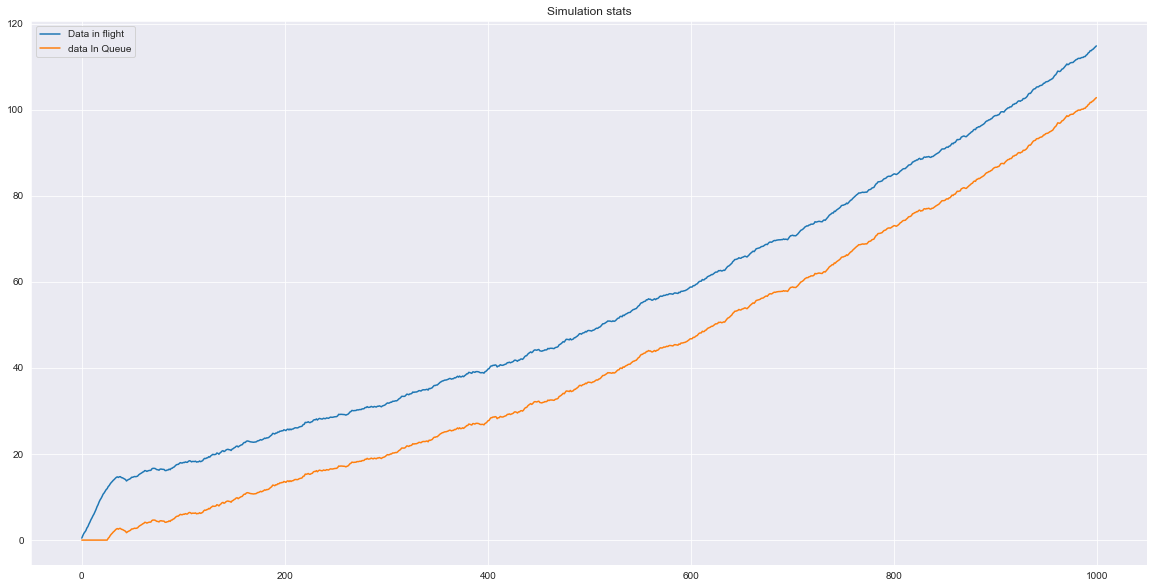

In [5]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], label="Data in flight")
plt.plot(simulator.stats['dataInQueue'], label="data In Queue")
# plt.plot(simulator.stats['packetsInFlight'], label="Packet in flight")
# plt.plot(simulator.stats['packetsInQueue'], label="packets In Queue")
# plt.plot(simulator.stats['packetsSent'], label="Packets Sent")
# plt.plot(simulator.stats['packetsAcked'], label="Packet Acked")
# plt.plot(simulator.stats['totalPacketsSent'], label="Total packets Sent")
# plt.plot(simulator.stats['totalPacketsAcked'], label="Total packet Acked")
plt.title("Simulation stats")
plt.legend()
plt.show()


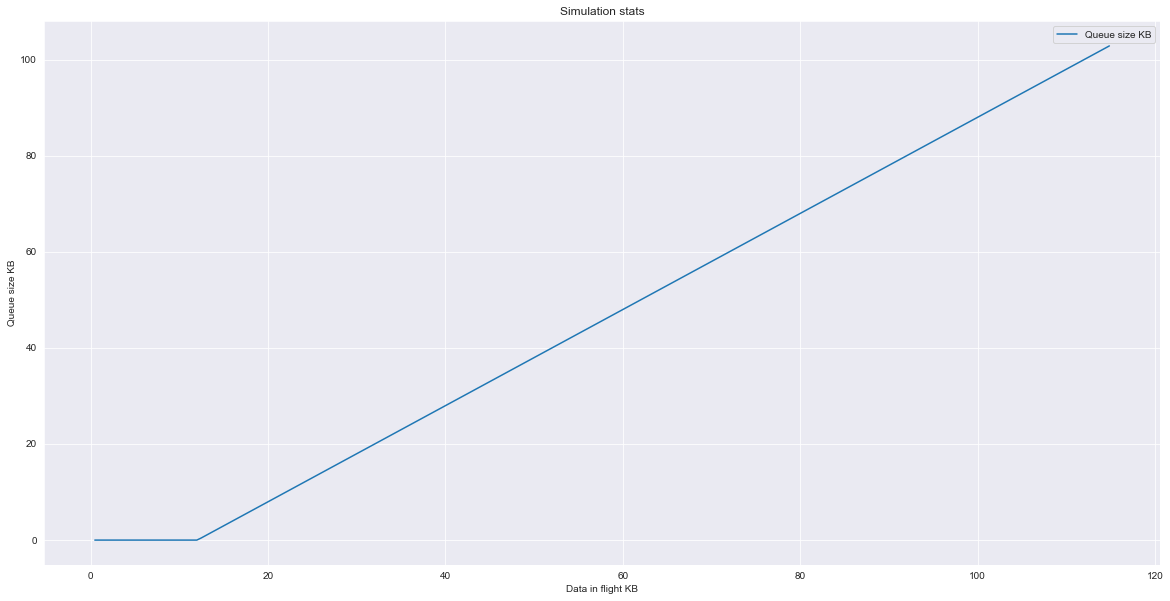

In [6]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], simulator.stats['dataInQueue'], label="Queue size KB")
plt.title("Simulation stats")
plt.xlabel("Data in flight KB")
plt.ylabel("Queue size KB")
plt.legend()
plt.show()

In [7]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
packetStats = analyzerTools.createDfFromPackets(sender.ackedPackets)

<AxesSubplot:xlabel='ttl', ylabel='Count'>

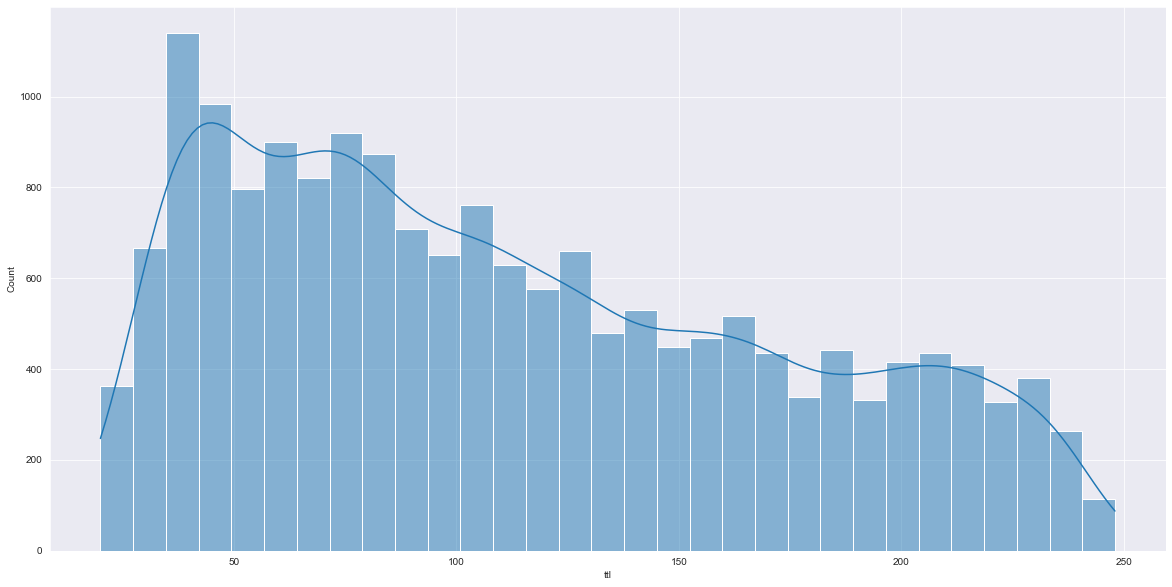

In [8]:

plt.figure(figsize=(20,10))
sns.histplot(packetStats.ttl, kde=True)

In [9]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data = packetStats, x='packNum', y='ttl', color='g')

In [10]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
dfPackets = analyzerTools.createDfFromPackets(sender.ackedPackets)

In [11]:
dfPackets.head()

,packNum,ttl,ttlNoise,sentAt,ackAt,isDropped
0,1,36,16,1,37,False
1,10,37,17,1,38,False
2,100,34,14,5,39,False
3,1000,41,16,41,82,False
4,10000,104,1,427,531,False


In [12]:
print(simulator.stats.keys())
dfStats = analyzerTools.getSenderStatsPerTimeStep(dfPackets, simulator.stats)

dict_keys(['dataInFlight', 'dataInQueue', 'packetsInFlight', 'packetsInQueue', 'packetsSent', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'queueSize'])


In [13]:
dfStats.head()

,avgTTL,minTTL,maxTTL,dataInFlight,dataInQueue
sentAt,,,,,
1,29.913043,21,38,1.04,0.0
2,29.103448,20,38,1.54,0.0
3,29.680000,21,39,1.88,0.0
4,29.705882,20,39,2.20,0.0
5,30.062500,25,36,2.80,0.0


In [14]:
dfStats.tail()

,avgTTL,minTTL,maxTTL,dataInFlight,dataInQueue
sentAt,,,,,
760,237.636364,235,240,79.60,67.58
761,235.636364,233,239,79.84,67.82
762,237.000000,236,238,80.06,68.04
763,236.500000,235,237,80.26,68.24
764,236.000000,236,236,80.42,68.40


<AxesSubplot:xlabel='sentAt'>

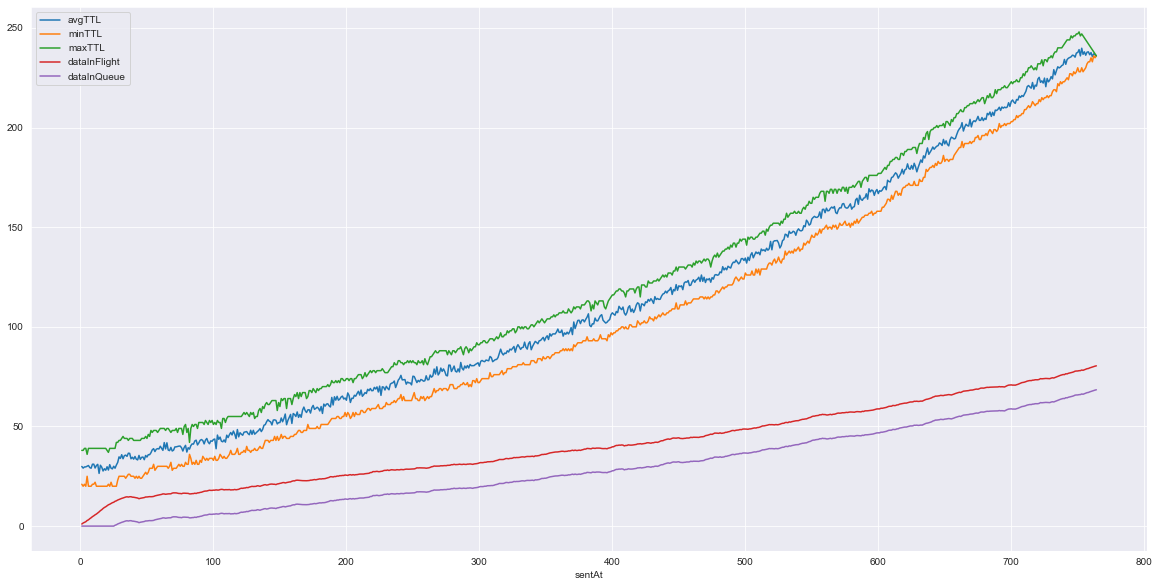

In [15]:
dfStats.plot(figsize=(20,10))

1000
(764,)


<Figure size 1440x720 with 0 Axes>

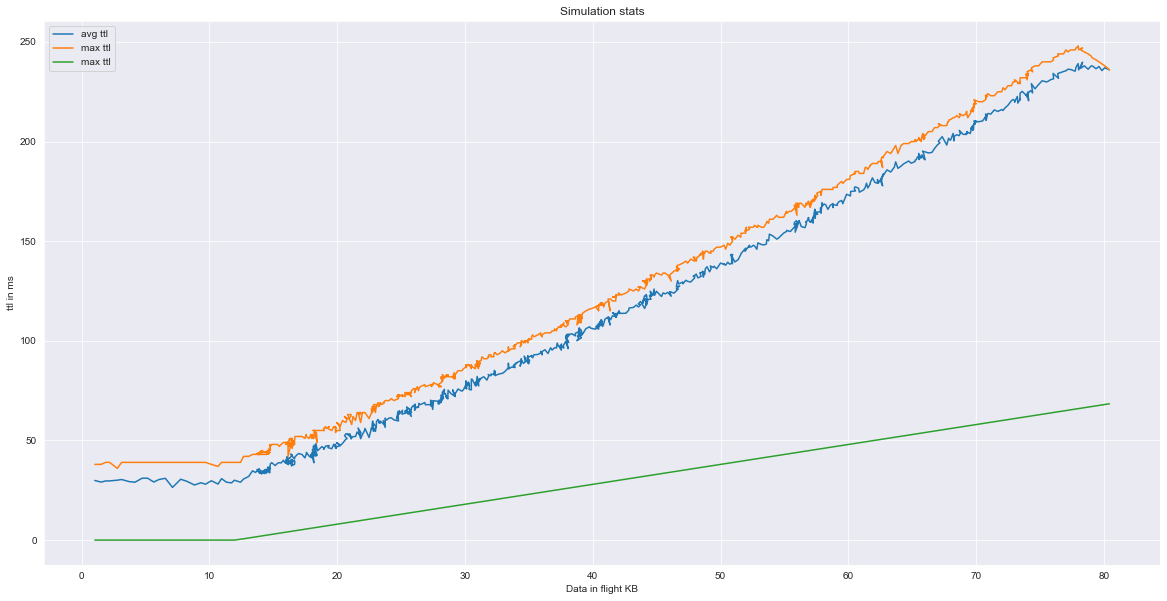

In [16]:
# data in flight vs others

plt.figure(figsize=(20,10))
print( len(simulator.stats['dataInFlight']))
print( dfStats['avgTTL'].shape)
# sns.lineplot(data=dfStats, x='dataInFlight')

plt.figure(figsize=(20,10))
plt.plot(dfStats['dataInFlight'], dfStats['avgTTL'], label="avg ttl")
plt.plot(dfStats['dataInFlight'], dfStats['maxTTL'], label="max ttl")
plt.plot(dfStats['dataInFlight'], dfStats['dataInQueue'], label="max ttl")
plt.title("Simulation stats")
plt.xlabel("Data in flight KB")
plt.ylabel("ttl in ms")
plt.legend()
plt.show()


In [17]:
dfStats.index.arraydata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABI8AAAJZCAYAAAAgQhUKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/d3fzzAAAACXBIWXMAAAsTAAALEwEAmpwYAADogUlEQVR4nOzdd5QUVd7G8W917smROOScs2QQFDGhYkRWzDmtWXd1zXFdw2tAdzHLropiQEUFAUGQDJLjkMMwgYk9PR3r/WO0cYQhToJ5PudwTlfVrXt/PVc9zsOtW4ZpmiYiIiIiIiIiIiIHYKnuAkREREREREREpOZSeCQiIiIiIiIiIuVSeCQiIiIiIiIiIuVSeCQiIiIiIiIiIuVSeCQiIiIiIiIiIuVSeCQiIiIiIiIiIuVSeCQiIiLHpV9//ZUxY8YwYsQIzj77bK699lo2bNgAwIoVK7j99tsrbKyhQ4eyYsWKg7ZZvnw5Dz/8cKWMX57XXnuNH3/8scLaiYiIiByIrboLEBERETlSfr+fG264gXfeeYcOHToA8NVXX3Hdddcxbdo0OnXqxCuvvFKlNW3cuJE9e/YAVNn48+fPp2XLlhXWTkRERORAFB6JiIjIccfr9VJYWEhxcXHk3DnnnENMTAyhUIhFixbxxBNP8M033/DAAw/gcrlYv349OTk5DB06lISEBGbMmEFWVhZPPvkkffv25YEHHqBVq1Zcc801APsdA4TDYZ5++mmWLVuGx+PBNE2efPJJGjRowCuvvEJhYSF/+9vfOO+88yLjFxYW8thjj7F27VoMw2DgwIHcdddd2Gw2OnXqxPXXX8+cOXPIzMzk2muvZfTo0ft931deeYWpU6dit9tJTEzkmWeeYerUqaxcuZJ//vOfWK1WWrZsyeOPP47H4yErK4u2bdvy8ssv89lnn5Vpl5iYyLPPPks4HAbghhtuYPjw4ZU8YyIiInI802NrIiIictyJj4/n3nvv5dprr+WUU07h3nvvZeLEifTr1w+Hw7Ff+9WrV/P+++8zfvx43nnnHaKiovj444+5/PLLGTdu3GGPu2zZMjIzM/nkk0+YPHkyI0eOZNy4cdSvX5/bb7+dnj178swzz5S558knnyQhIYGvv/6aiRMnsm7dOt555x2gdAVVYmIiH3/8Ma+88grPPPMMPp+vzP27d+/m/fffZ+LEiXz++ef079+f5cuX85e//IWOHTty3333MWzYMCZMmMB5553HhAkTmDJlCjt27OCnn37ar92rr77KVVddxeeff87TTz/NvHnzjmIGREREpDbRyiMRERE5Ll111VVcdNFFLFy4kIULFzJu3DjGjRvHZ599tl/bIUOGYLfbSU1NJSoqioEDBwLQuHFj8vLyDnvMbt26ER8fz8cff8z27duZP38+0dHRB71n1qxZfPTRRxiGgcPhYNSoUbz//vtcf/31AJxyyikAdOjQAb/fT3FxMU6nM3J/3bp1adu2LSNHjmTQoEEMGjSIvn377jfOvffey5w5cxg3bhxbtmwhMzOzzMqs351xxhk8/vjjTJ8+nX79+nHXXXcd9vcXERGR2kkrj0REROS4s3jxYt566y1iYmIYMmQI9913H99++y2GYTBnzpz92v95NZLNtv/fnxmGgWmakeNAILBfm59++okbbrgBKA19Lr300kPWGg6HMQyjzHEwGIwc/x4U/d7mjzUAWCwWxo8fzzPPPENCQgJPP/00//znP/cb56677mLChAk0bNiQK6+8kg4dOuzXF8CoUaOYNGkS/fv3Z/bs2Zxzzjn7rXYSERER+SOFRyIiInLcSUpK4o033mDRokWRc1lZWRQVFdG6deuj6jMxMZGVK1cCsGfPHhYsWLBfmzlz5jBkyBBGjx5Nx44d+fHHHwmFQgBYrdYyodDvBgwYwPjx4zFNE7/fz4QJE+jXr99h17V27VrOPvtsWrRowQ033MCVV14ZefPbH8ecPXs2t9xyC2eeeSZQ+ojdgWobNWoUa9as4fzzz+eJJ56goKCArKysw65HREREah89tiYiIiLHnWbNmvH666/z0ksvkZGRgdPpJDY2lqeffprmzZsfVRgyZswY7rnnHoYPH05aWhp9+vTZr82oUaO4++67GTFiBMFgkP79+zNlyhTC4TBdu3bl9ddf59Zbb2XMmDGRex566CGefPJJRowYQSAQYODAgdx4442HXVfbtm0544wzuOCCC4iKisLlcvHQQw8BMHToUF588UUCgQB33nknt9xyC1FRUcTExNCrVy+2bdu2X7t77rmHp59+mpdffhnDMLj11ltJS0s74p+XiIiI1B6GeaD1zCIiIiIiIiIiIuixNREREREREREROQiFRyIiIiIiIiIiUi6FRyIiIiIiIiIiUi6FRyIiIiIiIiIiUi6FRyIiIiIiIiIiUi5bdRdwpMLhMKFQzX1BnNVq1Oj6pPJo7msvzX3tpbmvvTT3tZfmvnbT/NdemvvaqzbNvd1uLffacRcehUImeXnF1V1GuRISomp0fVJ5NPe1l+a+9tLc116a+9pLc1+7af5rL8197VWb5j41Nbbca3psTUREREREREREyqXwSEREREREREREyqXwSEREREREREREynXc7Xl0IKFQkNzcLIJBf3WXwp49BqZZ9Ztp2WwOEhNTsVpPiCkVERERERERkRrihEgacnOzcLmiiI6uh2EY1VqL1WohFApX6ZimaeLxFJCbm0VKSv0qHVtERERERERETmwnxGNrwaCf6Oi4ag+OqothGERHx9WIlVciIiIiIiIicmI5IcIjoNYGR7+r7d9fRERERERERCrHCRMenSh8Ph9ff/0lAAUF+UyZ8j0ATz31KPPm/VKNlYmIiIiIiIhIbaTwqIbZuzcnEh5t3LiBOXNmVm9BIiIiIiIiIlKrnRAbZlc3j6eIZ599kqKiQvLz8xkx4jyGDDmVW265lvHjP8UwDF544Tl69jyJ1NRUXnzxn0RFRZGYmIjD4eTBBx+N9PXBB++wZctm3n13HMuWLWXjxg189dXn1fflRERERERERKRWO+HCo29X7WHSyowK7fOcjvU4q0Pdcq/v2LGDU089jcGDh7J3bw4333wtI0deSIsWrVi2bCnt23dk6dLF/PWvd3P99Vfw0EOP07x5C/7979fJzs4q09fll19NevpGrrrqOpYsWcRXX03k3HPPZ+XK5RX6nUREREREREREDscJFx5Vh+TkZCZM+B8zZ84gJiaGYDAIwIgR5/Hdd9+Qk5PDgAGDsNlsZGdn07x5CwC6dOnGtGlTqrN0EREREREREZGDOuHCo7M61D3oKqHK8NFHH9KxY2dGjryQX39dzJw5PwPQs+dJvPHGK2RlZXHXXfcBUKdOXTZv3kSzZs1ZtWrFfn0ZhgXTDANgsVgIh82q+yIiIiIiIiIiIn9ywoVH1aF//0H861/PMGXKdyQkJGC1WvH7/TgcDk4++RQWLVpAWlojAO6++36eeeZx3O4o7HYbqal1yvSVmJhIIBBk7NhXuOiiUWzatJEJE/5XHV9LRERERERERATDNM3jamlLIBAiL6+4zLmMjK3Uq9ekmioqy2q1EAqFy70+ceIEhg4dRmJiIv/5z1jsdjtXXXVdhYxdk34OtVFCQtR+/2xK7aC5r70097WX5r720tzXbpr/2ktzX3vVprlPTY0t95pWHlWxpKQk7rrrFtzuKGJiYsq8aU1EREREREREpKZReFTFhgw5lSFDTq3uMkREREREREREDoulugsQEREREREREZGaS+GRiIiIiIiIiIiUS+GRiIiIiIiIiIiUS+GRiIiIiIiIiIiUq8LDo0AgwL333svo0aO58MILmTZtGqtWrWLgwIGMGTOGMWPGMHnyZAAmTJjA+eefz8UXX8yMGTMqupTjXkZGBrNnzwIgPX0jv/66BIALLxyBz+erztJEREREREREpJao8LetTZo0iYSEBJ5//nlyc3MZOXIkt9xyC1dddRVXX311pF1WVhYffvghEydOxOfzMXr0aPr374/D4ajoko5bS5YsZOvWLQwYMIiffppGcnIyXbt2r+6yRERERERERI5L9l3zcC8ZS+EpL2G6k6u7nONGhYdHp59+OsOHD48cW61WVq5cyebNm5k2bRpNmjTh73//O8uXL6dbt244HA4cDgeNGzdm7dq1dO7cuaJLqnSTJ3/NnDmz8Pl85OTkcNFFo/j555ls3pzOLbf8lYEDT2bixE+YOXMGwWCQmJgYnnrqeSZN+oIVK5bx6KNP8eSTj9C+fUfOP/8iAEKhEOPHv0dJSQlNmzbju+++wWaz07p122r+tiIiIiIiIiLHJ1vGYpxbp2P55nLyzp0AjujqLum4UOHhUXR06Q++qKiI22+/nTvuuAO/389FF11Ex44deeONN3j99ddp27YtsbGxZe4rKio65vGdaz/DtebjY+7nj0rajcLX9sKDtikuLuall15n+vSpfPTReP7zn/dYunQxn376Ef37DyI/P5+XXx6LxWLhrrtuZc2aVVxwwcUsWjSfp556lEAgEAmOoDR0u+yyK9m6dQtnnHE2u3btJDk5mfbtO1bodxMRERERERGpbWyZy4md+TcKh71S3aUcFyo8PALYvXs3t9xyC6NHj2bEiBEUFBQQFxcHwLBhw3jiiSfo2bMnHo8nco/H4ykTJpXHajVISIgqc27PHgOrtXT7JovFwDCMCvw2pX3+3n9519u0aYvVaiEmJoZmzZpjs1mJj4/H7/djt9twOBw89tiDuN1RZGVlYpphrFYLl19+FddddyXvvfff/cawWIzI2KXfyxJpY7Va9mtvGPv/bKTqWK0W/fxrKc197aW5r70097WX5r520/zXXpr7E4fFVbpVjtniFJw5K7AeYl4196UqPDzKzs7m6quv5uGHH6Zv374AXHPNNfzjH/+gc+fOzJ07lw4dOtC5c2defvllfD4ffr+f9PR0Wrdufcj+QyGTvLziMudM0yQUCgPgbX0B3tYXVPTXgt/6P5Bw2MQ0idTwez3hcBjThHXr1jFz5gzGjXufkpISrrnmMkKhMCUlPl566V/ce+/fee65pxk79i3sdvsfvlfp42ul/Rp/+Fw6VuhPNZnm/j8bqToJCVH6+ddSmvvaS3Nfe2nuay/Nfe2m+a+9NPc1n3vZW7iXjD1kOyNQuojFb4nG7is65LzWprlPTS1/QU+Fh0dvvvkmBQUFjB07lrFjSyfugQce4Omnn8Zut5OSksITTzxBTEwMY8aMYfTo0ZimyZ133onT6azocmqEtLRGuN1urrlmDA6HneTkFLKzs3jjjVfo128A5557PtnZWbz55qvcdttdkftatGjJBx+8Q+vWbWnTph1jx/4fTZs2q8ZvIiIiIiIiIlLzuFZ/BDY3/rQBh2wbim+CtWgXRqB2hEIVwTBN06zuIo5EIBDaL/XLyNhKvXpNqqmisqxWy34rgqpKTfo51Ea1KZGWsjT3tZfmvvbS3NdemvvaTfNfe2nuax5H+mRiZ/4dwgEALL58ivo8gLfHrYd1f/Tcp4laMpZAaieKT7oHf9NTDtiuNs19la48EhERERERERGpLIa/kNiZDxJ2JeJvNLD0pMVOSbtRh92HaXMDYM9aQezU28i9eDLh+KaVUO2JQeGRiIiIiIiIiBw3ohb9HxZvFvlnvUuwbtej6yTkB6C4y/W41n5C/LdXkT9iPOHYhhVX6Amk/FeIiYiIiIiIiIjUINa8TbiXvY237SVHHxwB3k5XUXjys3j6/4OCM97C4skg4bMR2DKXV1yxJxCFRyIiIiIiIiJSc4QCRM1/npQ3W5AytgnONZ8AYMtYTNx312FanXj63H9MQ5jRdSjpcBkYBoGGfck7/0uwOkj44kIs+VuO/TucYBQeiYiIiIiIiEj1CAUg5Iv8seZuJOHz84he9H/4mp1GKKk10fP+Sey0u0iceC6GL5/C4WMxo+tUbBnJbcgb+TkQJnrhyxXa94lAex6JiIiIiIiISJWz7/yF+EmjMcLBMufDznjyh7+Jv+XZ2HfNK10NtP4LirvfjKfHX8ERXSn1hGMb4O10Je5f/0M4KoXiHrcBUZUy1vFG4VENlpGRwcaN6xkwYBDp6RspLCyga9fuXHjhCP77389wOp3VXaKIiIiIiIjIUQnFNgaLg7A9Bm/XGzANAyw2fK3OJRxTH4BAgz7kn/4fQkltCCW2qPSainvegcWbg3vpv3Gt/hhz8P3Q/BKwOip97JpMj63VYEuWLGTFimUA/PTTNLZs2VTNFYmIiIiIiIhUjHBcGsVdrsHiy8PfoDfeHrfi7XZjJDj6nb/FmVUSHAGYjhgKT3mJ3Iu/J5jaCeuUvxE35eYqGbsm08qjCjB58tfMmTMLn89HTk4OF100ip9/nsnmzenccstfGTjwZCZO/ISZM2cQDAaJiYnhqaeeZ9KkL1ixYhmPPvoUTz75CO3bd+T88y8CIBQKMX78e5SUlNC0aTO+++4bbDY7rVu3reZvKyIiIiIiInLsDE8mrjUTCMY3I5TSrkrHfmP2ZnI8AR4a3vqA10OpHcg/538kLXsZ55wXsOasJZRce38fP+HCoyk7vuO7Hd9UaJ9npJ3NaWlnHLRNcXExL730OtOnT+Wjj8bzn/+8x9Kli/n004/o338Q+fn5vPzyWCwWC3fddStr1qziggsuZtGi+Tz11KMEAoFIcARgtVq57LIr2bp1C2eccTa7du0kOTmZ9u07Vuh3ExEREREREaly4SBxU27C4s8n95zxmI7YKhs6zxvgnfnbAbhnaAtcduuBGxoG4ZNuwjJ/LO5fx1F0ygtVVmNNc8KFR9WlVas2AMTExNC0aTMMwyA2Nhafz4/FYsFut/Poow/idrvJzMwkGCzdEOwvf7mSG2+8irffHl+d5YuIiIiIiIhUOKM4CyPo2++8e/nbOHbNp+DU/yOUXLWrjiatyIh83pbrpXWdmPIbRyVR0u5iXKv+h7frdbV29dEJFx6dlnbGIVcJVQbDMMq9tnHjBmbN+olx496npKSEa665DIBAIMArr7zAvff+nX/96xnGjn0Lu91epk/TDANgsVgIh83K/RIiIiIiIiIiFcS+az4JX1xQ7nVvxyvwtSn/emUIhU0mLttFrNNGoS9YJjzaureYqeuyuLxXIxy2fVtEF3e5DtfKD0n6+FSKu1yHZ8AjVVpzTXDChUc1UVpaI9xuN9dcMwaHw05ycgrZ2Vm88cYr9Os3gHPPPZ/s7CzefPNVbrvtrsh9LVq05IMP3qF167a0adOOsWP/j6ZNm1XjNxERERERERE5PJb8rQAU9XuIsCuxzDXTHo2/2fAqr+mXzXvZVeDjkdNb89j369me5wVgXWYRt322glxvgIYJLs5oVzdyTzi+KfnnfIRr9f+IWjYOX/MzCDY4qcprr06GaZrH1XKWQCBEXl5xmXMZGVupV69JNVVUltVqIRQKV8vYNennUBslJETt98+m1A6a+9pLc197ae5rL8197ab5r70090fHvewtYmY/SvY1KzFdCdVdDgDvL9jOaz9vZuZt/bnw3YX0bpLIhV0bcNtnK3DbLRiGQVqCizcv7gL8ae79HpI+PhUMg9wLv8F0J1XjN6l4qanl7ztlKfeKiIiIiIiIiMghWPK3Ys1evf+f3HRMDExnXJXV4g+G2VvsP2Q7iwGNE91sy/Xy4ox03HYLb13alQu61Gfx9nzu+Hwl367aQ2FJYN9NjmgKTnsdi2cPcd9dB6FDj3Oi0GNrIiIiIiIiInJUbFkrSJxQ/r7DYXcqGFW3buWln9L5bNlu2tWN4eSWKQxumUzz5KgD7lPcKMHNd2sy8QXD3DqwGfXjXFzavSFFvhBT12Xy6Pd7eWrqei7u2pDbBzfj7bnb6N20Jb1OeZG4KbcQ89PfKBr6LzjIHsgnCoVHIiIiIiIiInJUXKv+i2lzUXDKy2DZ/5X3ofiq27c3FDaZtj6bVqnR2CwGb8zZwhtztjCoRTLPjWiHzVo2xGqc6MYXDGMAp7erA4DLbuW2Qc24dWBTVu4uZNLqTP67eAfrsopYtC2PL1bsZsKVZ2HtuYHoRS9TEN0US5/bquw7VpcTJjwyTfOgbzw70R1nW1eJiIiIiIjICcCxdQb+RoPxtzy7WsYPhU3mbcll9qYcujaMJ9cb4J6hLTitbR2yi3x8uSKDf/+ylSemrOfR09uUubdxohuAXo0TqBvrLHPNMAw6NYhjQLu6GGaYL5Zn0CDOSUahj0veW4TH15vn6MMpi14iv+dNWG0nTLxyQCfEt7PZHHg8BURHx9XKAMk0TTyeAmw2R3WXIiIiIiIiIrWApWgX1vythF0JWPM2Vfn4Rb4g/120g0krM8gsKt176MsVGcQ6bfRvXrqRdUqMk2v7NsEw4M05W0mJdhDnskf6aJUag9WA8zrXL3ccwzC4/5RWNEpw069ZEvO35jJvS27pfkkJL7Iy3kPTEzw4ghMkPEpMTCU3N4uiorzqLgXDMKplFZDN5iAxMbXKxxUREREREZHaxVK4k6T/nYwRLH3NvWmxQzh0wMfWKsvk1Xt4a942+jRJ5O4hLXhl1mZ25pcwplca0Y6yUcfVvRuTXeTng4U7aJYUFTnfIN7F5Bv7kBR18IUYVovBmF6NAGiREs3oHmkV/4VquBMiPLJabaSklJ8UViW9wlFEREREREROZNHzngUzTP5Z72Ha3IRj6ldpcGSaJgu25uG0WfjXeR1w2izM2bwXbyDEJd0a7tfeMAzuGdqSvcUBpm/ILnPtUMGRlDohwiMRERERERERqXy2Pb/iWv8Fnh634W96aoX3n+cNsC6ziA1ZHvK9Aa7t2wSnrexG11PXZTEzPYfbBzWLXLt7SEtuHhAiynHgEMtqMXj8zLbkTlzBil0FWC21b8ubY6HwSERERERERETKZd27gVBcI7A6iZ7zBGF3Ct7ut1T4OEt25HH7xJX4guHIuV827+Xps9vR5LfHzfYW+/nntI10qBdb5vGxKIe13ODod06bhVfO78i2XC/2P715TQ5O4ZGIiIiIiIiIlCvpoyEAFJw2Fsfu+RQOfhbTEVOhY+zKL+H+SWuoG+vk/lNa0io1mgveWcT6LA+XvL+YwS2SySrysSOvhOJAiIdPb31Uq4dcdiut61Rs7bWBwiMRERERERER2Y996wxseemR47gpNxNMbE1J+1EVOo7HH+TuL1cRDId54bwONP1tldFrF3biyxW7WbuniE05HlJjnPRrlsgprVNpnhxdoTXIwSk8EhEREREREZH9JHwzZr9zRQMeBkvFRQlh0+SRyevYlOPh/87vGAmOANrXi6V9vdgKG0uOnsIjERERERERkVrAlrGEYEo7sLmxZSwhHF2PcGyDAzcOhyIf9146A9Nqx3SnVPjjam/O2cLM9BzuGtKCPk2TKrRvqTgKj0REREREREROdKZJ4sRzMG1R5F48mYTPzwPDhrfDXyjucRtmdJ0yzS2ePX+4N0w4vmmFlzR/ay7vzt/OuR3rMapbOSGW1AjaXlxERERERETkRGeUbi5tBIuJWvACWF2UtBmJe+UHJI/vR/QvT5UJjKyF2yKfXWs+qZSSYp2l61nqxDowjCPf/FqqjsIjERERERERkVogFFW6usi18WuKu1xL0dAX2Dv6J3zNz8S99E2SPuhD7NTbsGUswVKwPXKfESqplHra14ulX7NExi/aQY7HXyljSMXQY2siIiIiIiIiJwrTxLnhSyzenP0uheObYC3OBMDb9frScwnNKBz2Cp5ed+Je8R6uNZ/gWv8FYUccJgbZ160Fx7G/2cwfDDNlXSbeQBi7xaA4EGLquixW7i7EZjHYW+wnOdpxzONI5VB4JCIiIiIiInKCsOZtIm7qbYdsZ7oSyhyHE5rhGfgYxb3vxbn2U9wr3sVMaFYhwRHAP6dv5KsVGWXOtUiJ4o7BzTm9XR0FRzWcwiMRERERERGRE4Q1Lx2AvHP+RzC18wFamJjOhHLvNx0xlHS+ipJOV0b2STpab8zZwsKteZzXqR5frcjgipMaMbpHQwIhE4A6Mdrr6Hih8EhERERERETkBOBIn0zsjPsIO2IJ1umC6Yw/+s6OINQxTXO/ECgYCvPOvNJNt9dnFdGrcQI39W+K1aKw6HikDbNFREREREREjlMWTwZRi/6P2B9uJv776wnFNyHvwm+OLTg6ArvySzjj3/P5fNmuMud/3rQ38jneZeOps9oqODqOaeWRiIiIiIiIyHEqasELuFd/hGlx4OlxO8W97gSrvcrGn70phxyPn2d/3EiC287Q1qkAfLliNwBJUXaeHdGexCjtaXQ8U3gkIiIiIiIicjzye3BumERJ24spHPrCMe9RdDTmb82jfpyT1BgnD01ey6tuOw3jXczdnMs1fRpzY/+mVV6TVDw9tiYiIiIiIiJyHHKmf4Ml4MHbblS1BEcA6zKLaFs3lhfP60BavJu7v1zFK7M2A3Bup3rVUpNUPIVHIiIiIiIiIjVdKIBz7Wc4Nn0PZunbytxrPiaY0IJg/V6VNqxpmlz9v1/5cV3WAa93aRDHku15xLpsvHJBR6IdVqauy6J300Tqx7kqrS6pWnpsTURERERERKSmMk0cm6cQPfcpbHmbAPA1GYq3y7XYdy+kqO/fK3XVUdiEFbsL+Ns3BZzaJrXMtUAozPqsIuJcNiyGQb04F69c0IlHvlvHlSc1qrSapOopPBIRERERERGpgYzibOJ+uAHHrvkEE1qQf8bbWAu3Ez3vOZxbp2NabJS0ufCo+l65u4BGCW7i3QffXPtgb0j7eMlOtuz18tLIDpFzLVKiGT+m+1HVJDWXwiMRERERERGRGsiWl45j13y87f9C0aAnI29R8zU7jZjZjxGKa4IZXeeI+92e6+Xaj37ltLZ1ePzMtod9XzAUxmYt3f0mu8jHW3O3MaB5EgOaJx9xDXJ80Z5HIiIiIiIiIjVQMKk1YXsM1sIdkeAIIBzXmIIz38Yz4OGj6vf9hdsJmTB1XRZZRb5y232/JpOPl+ykXd0YABZsy4tc+79ZmwmEw9w9pMVR1SDHF4VHIiIiIiIiIjWFGca+Yw6xU24l+b2eWAJFhB2xFdZ9RkEJ367aw8DmSYTCJp/9uqvctu/O38YLM9JZs6cIgG9W7QFg+vosvl+TyeW9GpGW4K6w2qTmUngkIiIiIiIiUgM4tvxI0vgBJHx1CY5tMyhpP4rci7+n8PQ3K6T/gpIAb83dhgncd0pLBrdMZuKy3ZQEQgdsf9fJZVcVzdiQTUZBCU9O2UD7erFc06dxhdQlNZ/CIxEREREREZHqFg4SM/NvmBY7BcNeJefKRRQNeopgascK6d40TS54ZxFfrczgrPZ1qBfnYlT3huSXBPl+TeYB7wmaJgCvX9gJm8WgcaKbf0xeS9g0eeqsttitihRqC820iIiIiIiISBVxpH9L8rj2WHPWlj2/eQrWot14+j2Ir/VIsFXs42CGYRBlL40A7vxtRVH3tHhap0bz0ZKdmL8FRX+0bGc+VgM6NYjj4m4N2JRTzK87C3jg1FZ6XK2WUXgkIiIiIiIiUsmMklyif36E+O9vwOIvwL3ivTLX3SveIxSbhr/JKZVWw8mtUnBYDWwWo7Qmw+DSHg3ZlFPMgq15Zdp6/EFmb9pL6zoxuO1W2v62afZZHepyersjf8ObHN8UHomIiIiIiIhUAsNXQNSiV4n/+jKSPuyPe8W7eNuNIhRTH+emHzB8BQBY967HsfMXvB3HgMVaafWc1DgRf8hk2a6CyLnT2tQhKcrOR0t2UuQL8sOaTO6ftJrT35hHeraHUd0bAnByyxRuH9SM+4a2rLT6pOayVXcBIiIiIiIiIicSw7sX9/K3cS9/F4u/gGBye/yNBlHc605CyW2wZS4j4dOziVrwAp6Bj+Fe+T6m1UlJu0srvJZ1e4pYsC0Xm9VCMBQGYMHWPHo3SQTAYbNwYdcG/OeXrQx/Yy7+kElytIOzOtTl7A516Vg/DgC33cqYXo0qvD45Pig8EhEREREREakg7sWvETPvWQB8Lc7C0+N2QqkdyrQJ1ulCSYfLcK94F1+Ls3Cu/QxfyxGY7qRjHj/fG2BtZhGtUqMZ+/MWJq3M4M+7GeUW+8scX9SlAct25tM8OZqhrVLo1CAO62+PtomAwiMRERERERGRCmHLWBwJjvLPeh9/0/L3L/L0uQ9n+jfEfzMGS8CDt9OVxzz+mj2FXD5+aeTYaind0+jyXo2wWw0CIZNAKExKjLPMfQlRdl67sPMxjy8nLoVHIiIiIiIiIkcr6CV6wYu4f/03hhkmFNOQ/HP+RyixxUFvM12JePr+ndgZ9xKo04Vg3a7HVMZXK3bzz2kbsRoQMqFHo3geOKUVTZOjjqlfEVB4JCIiIiIiInJUrFmriJt6G7bc9ZFzgbrdDhkc/a6k3SVY967H32zYMdWxeHseT07ZwEmNE3jqrHZEO63YLAaGoUfPpGIoPBIRERERERE5QvZtPxH/7VWEXYnkjRhPoGFfUt9sgSv9GwoPtxPDgmfAI8dcy/hFO0h023nhvA647JX3tjapvRQeiYiIiIiIiBwh54avMR0x5I76MbLRtbf9pVgLtldpHesyi5i9aS/X92ui4EgqjcIjERERERERkYPJ3UzCp1dhBL0EGvalaPDT2PauJZjSocwb0oqGPF/hQ5umecDHz0Jhkwm/7uKN2ZuJc9m4qEuDCh9b5HcKj0REREREREQOpiQfe9ZyAMKxDcEMY9u7Hm/70ZU67OqMQm6asJy6sU5a14mmdWoM/lCYNXuKWJVRSI7HT/9mSdx/aksSouyVWovUbgqPRERERERERA6m3r7X2Ht63YmlYDtG0EsouU2lDhsIhSkOhDAMWLazgB/WZmEATZLcnNQ4gZNbJjOkVYo2xpZKp/BIRERERERE5GD2pkc+But0xbF1WunnpMoNj1qkRAMwvG0dru7TmIKSABbDIMapX+WlaumfOBEREREREZHymGGs3/41cmjLWo4tZx0AoaTWlTp0jNNGgzgnG7M9AMS59GiaVA9LdRcgIiIiIiIiUlO5Vo3Hsn0eRf0ewsTAsXUG1r1rCcWmYTpiK3XsIl+QGKctEh6JVBetPBIRERERERH5jeHdS9TCl3Bt+ArMEIa/iHCzwXi73oAz/Vsc22ZgBL2V+shasT/EJ0t38t9FO8gvCXJ+5/qVNpbI4VB4JCIiIiIiIhL04l7+DlGLX8MIFONreTZhVxLYXNgH3gYhA3/jk4la+DJYrPibDK3wEkoCIT79dRcfLNxBnjfAgOZJXN+vCe3qVu4KJ5FDUXgkIiIiIiIitY/fQ9yUm3HsnFN6HA5hhAP4mg7D0/fvhJJaRZomxEZBXjH+xkOIXvgShIMVvvJoU46H+75azdZcL32aJnJDvyZ0rB9XoWOIHC2FRyIiIiIiIlKrGL4C4r+5HNuepZR0uAzT7gYM/E2GEGjYr9z7gnW6EHYlYinJJZjc7qjGzisOsCPfWyYY+nFdFo//sA633cprF3aid5PEo+pbpLIoPBIREREREZFawyjJI/7rv2DLXkXB8LH4W5x1+DdbrPgbDca58WtCCc2PavzHfljH7E17+eyqnmzP8zIrPYcvlmfQqX4sz45oT51Y51H1K1KZFB6JiIiIiIjIicE0wTDKngsHwQwDvwVH34zBtncDBaePw99s2BEP4elzH75W54DN9YdhTUIm2CzGfu1XZxSSXxKgb9MkTNNk0bY8AC58dxEAVgMu7tqAO05ujt2qF6JLzaTwSERERERERI57towlxE++muLut+Dtci2Eg0TPfQb38rcwfguPAEyrk/yz3iHQ+OSjGicc1xh/XOPIcY7Hzx2fr6ROrJMXzusQOb8z38vrP29h6rosDODmAU2ZviGbkmBpLae2TuHibg1pVzcGl916VLWIVBWFRyIiIiIiInJ8C/mInX4PRkkuMXMew5q7EVvuBuy7F1DS5kJCCS0iTf2NBxOs07lCht1T6OPmT5ezLdfLphwPgVCYTdnFXDZ+CQBOm4Wrezdi2vpsXp+9hbQEFw8Oa8VZHepqlZEcVxQeiYiIiIiIyHHNvewdbLnryT/rPey75hG19E1Mm5uCYa/ha31epYy5u6CEGz9ZRn5JkNE9GvK/xTtZn+Xhyv8uBSizh9F5neuzPtND/+ZJB3y0TaSmU3gkIiIiIiIix6+QH/eyt/CnDcTf9FT8TU8l0LAfobgmhBJbHPr+o/TfRTvIKQ4wblQXEt12/rd4Jy9MTwfgzPZ1eOyMtpG29eNc1I9zldeVSI2ndXIiIiIiIiJy3HJu+Apr8R6Ku90YOedvMrRCg6PcYj/vL9hOsT8UObdydyEd6sXSrm4sdX97Q9qK3QWkRDv4x/A2FTa2SE2g8EhERERERERqtnAQa94mLIU7S/94MkrPmyZRi18lmNyWQKNBlTb86t0FvPbzZi55r/QNaf5gmPVZRXSoFwuAYRj8/jBarNOmR9PkhKPH1kRERERERKTmMsOkvtF0v9MlbS8mmNQGW94mAvV7gVF5gU2fZskAZBT6WL6rAKsBgZBJx/qxkTa3DmzGqz9v5oFhLSutDpHqovBIREREREREaqaQj+i5z0YOC4f8CwBrzmqilr8TOV/c5dpKLcNqMbigS30mLtvNPyav5S89GgLQvt6+8Gh0j4ac0iaFhvHuSq1FpDooPBIREREREZEaKfXNffsWhd3JlLQfFTm25azFsfMXAPwtzqr0Wi7s2oCJy3azK7+ElbsLSYl2RPY6ArBZLQqO5ISlPY9ERERERESkegW9pX8Owtfs9DLHvwdHued/UWll/ZH9D/sYrcoo3SzbqMRH5URqEoVHIiIiIiIiUq3ifryD5PdPwrluIpgmALY9v5ZpE46pd8B7g/V7VXg9GQUlfLl8NyWB0rer+YNh3l+wPXJ9W66XDn/Y70jkRKfH1kRERERERKRaWXM3Yvjyifvxr/jWf0k4ph6u1R+XaROOLhse7b10OqH4phVah2mafLUig5dnbsLjD/Hugu1cdVIjPl+RwZqMQk5tncL0DdmETSJvWhOpDbTySERERERERKqVxZtNSbtRFA14DMeu+bjWfoq36/UUnPZGpE04um6Ze0JJrcHqqLAaMgt93PHFSp6auoG2dWN45ux2OK0Wnpq6gcxCH/86tz3PjGjPSU0SMSi7WbbIiU4rj0RERERERKTaWPM2YfHmEI6qg7fLNfhangXBEsLxTbEU7HtULBR94MfWKoLHH+SK/y6l0BfkniEtuKhbAyyGweCWyczcmMOQjvWxBoIA3D6oGStapRDj1K/TUnvon3YRERERERGpFs51E4n78a8AmK4EoOzjaeHYhpg2N0bQu99jaxVpwtJdZHv8vDWqC10axkfO260WTm2TSkK0g7y80vCoVWoMrVJjKq0WkZpI4ZGIiIiIiIhUHdPEmrcJ++4FxMy4b9/5cHD/toaFYGJLbDnrMF2JlVJOkS/I+EU7GNA8qUxwJCL7KDwSERERERGRKhO14F9EL/o/APyNB1PSdhRxU24imNL+gO2DdbpghINgGMc0btg0efKH9QTCJjf2b0LDeDcAHy3eSUFJkBv6NTmm/kVOZAqPREREREREpMr8HhwBFJw2FtMZT069HoRjGxywfVH/hzFCvmMe94MF2/l61R5sFoNp67MY1a0hF3Stz38X7+Dklsm0rasNsEXKo7etiYiIiIiISNUIBcocOrZMAyg3OALAHnXIR9ayi3xMW59V7vWlO/J5c84WhrVJ5atrT2J42zqMX7SDC95eSLE/xA39mh72VxCpjbTySERERERERCpewItj2wyMcChyyvAX7Luc0hFfizMrZKhxc7fx+fLdjL3IRq/GZYOmvOIAD327hgbxLv4+rBUxThuPnN6GUd0b8sbsLTRJctMyNbpC6hA5USk8EhERERERkQoXteR1ohe9XO71gjP+AzbXMY8TDJvM2JANwEs/beLVCzqRFGXHMAxKAiEe+X4tud4A717ajRjnvl+B29SJ4eXzOx7z+CK1gcIjERERERERqVjhEK61n+BPG0DRwMfLXDLt0ZjOOEzH4e8xtDPfS2ahn25p+78Nbc6mHHK9AYa1SWXquixOf3Me0Q4rpgnFgdJVT/ef0pI2dWOO7TuJ1GIKj0RERERERKRCOdd/gbVoN0UDHyeU1PqY+jJNk/PeWgjAwrsHlblWWBLknq9WA/Dw8NZc3LUBazOL2JHnxWIYJEbZaZYUxeCWycdUg0htV+HhUSAQ4O9//zs7d+7E7/dz00030bJlSx544AEMw6BVq1Y88sgjWCwWJkyYwMcff4zNZuOmm25iyJAhFV2OiIiIiIiIVCbTxJaxCNMZTyipNYa/iOi5TxOo2w1/s+GH1cWUtZl4AyHO7VR/v2tLduRHPhf5gmUePftm9Z7IZ5fdSte0eLoeYHWSiBybCg+PJk2aREJCAs8//zy5ubmMHDmStm3bcscdd9C7d28efvhhpk2bRteuXfnwww+ZOHEiPp+P0aNH079/fxwOR0WXJCIiIiIiIhUt4MW1/nPcy9/BtncdpsWGp99DWIozsRZnUnDm22Ac3gu+P16yi5W7C6gb66RP06Qy1176aVPk8+fLdjOqe0Mu/WAxN/Vvyosz0gE4u0PdivteIrKfCg+PTj/9dIYP35cuW61WVq1axUknnQTAoEGDmDNnDhaLhW7duuFwOHA4HDRu3Ji1a9fSuXPnii5JREREREREKoilYAfuFe/iWvMJFl8egZQOFA75J47NPxIz+1EASlqPJFi322H36Q2EMIF/TF7Hf8d0p06sE4DJq/ewLrMo0u7jpTsZ1CKZbble/rd4Z+T85b0aVch3E5EDq/DwKDq69BWHRUVF3H777dxxxx0899xzGIYRuV5YWEhRURGxsbFl7isqKjpgn39ktRokJERVdNkVxmq11Oj6pPJo7msvzX3tpbmvvTT3tZfmvnbT/JeyzngOy+ovCLc9h2CvG6BRH1yGAX2vJvzBWVh2zMfW64oj+lmVhMJ0SYtnQ2YRj/ywng+v6oXNauGR79ZF2gxrV4epazL5bGUGACt2F0SudW6WjNViVNyX/BPNfe2luS9VKRtm7969m1tuuYXRo0czYsQInn/++cg1j8dDXFwcMTExeDyeMuf/GCaVJxQyycsrroyyK0RCQlSNrk8qj+a+9tLc116a+9pLc197ae5rt9ow/+7Fr2HPXIa/YV9K2o8Gm6tsAzNM8uZZlLQcQeEpY0vP5Xv3XT93IgRLSu87gp9VUUmQ3o0TOL9TPR75bh3Xvr+IVqnRZdqc1bYOm7M8fLp4x373FxZ49ztXkWrD3MuB1aa5T00tP5M5vAdQj0B2djZXX3019957LxdeeCEA7du3Z/78+QDMmjWLnj170rlzZxYvXozP56OwsJD09HRatz62XfhFRERERETkKPg9xH17JTHznsW56Ttif34Ya/6W/ZpZ967D4s3B3/ggLzv6c+B0GLyBEFF2K2e2r8uVJzVizZ5CPly4vUybenFOLuuZRtgse2+n+odehCAix6bCVx69+eabFBQUMHbsWMaOLU2iH3zwQZ588klefPFFmjdvzvDhw7FarYwZM4bRo0djmiZ33nknTqezossRERERERGR8pgmjvRviZn9KFZPRplLoaT9/3LfsWMOAIGG/SqshGDYxBcME+WwAnDLwGbcMrAZpmmyq6CE895aCEDdWCeNE92Mnb2ZbI8/EiK1rhNTYbWIyIFVeHj00EMP8dBDD+13fvz48fudu/jii7n44osrugQRERERERE5BEvRbmJmPohzyxRC0fveVha2R2MJeHCteJ+Szlftu8E0ca77nGBiK8JxaRVSQyAU5tHf9jX6PTz6nWEYNIx3065uDNvzvMQ4S399/evg5izclkdGgY95W3PpnhZfIbWISPkqZc8jERERERERqVmMklzcKz/ACHgh5MO15mOMcICifv/AtW4iePYQqNOVvAsnEf/N5cTMfZpA48GEEpoDYN8+C3vWcgqHPH+IkQ7ff37ZypR1WQBE2a0HbHN5r0Zs2btvz5nT2tbhtLZ1KqwGETk0hUciIiIiIiK1QMysf+Da8CWmxQ6UPnpWOPgpwvFNsXh2YyncTt75n4NhoXDIP0n86FRip91F3siJYLESteQ1QtH1KGlzwTHV4fEH+WJ5Bh3rxfLBH/Y1+vPKo9+d2ib1mMYTkWOn8EhEREREROQEZMtYguEvIND4ZGx7luLa8CWeHrdR3Of+/dp6BjyKZ8CjkeNwTAOKBj1O3I934F42jkD9Xjh2zqWo/yNgdRxTXSe/+kvkc4M4JznFAXzBMO5yVh6JSPWr8LetiYiIiIiISPVLmHguCV9fBgEvMXOeIOxOwdv9lsO+39f6AnzNhhM9/3lifn6EsDMBb/vRFVZfx/qxPHdOe9r8tuF1gtteYX2LSMVSeCQiIiIiInICCiW2AiBu6q3Ydy/Ac9I9mI4jeDOZYVB48rOY9ijsmb/i7Xw1OKKPqaawaUY+n9W+Lm3rxnLXyc25vFcaHerHHlPfIlJ59NiaiIiIiIjICcjX4kxsi9bj3PwDwcTWlLQfdcR9mFGpFJ7yMu6lY/H+8c1rR2hjtoep67IoCYQi556btpGzO9SlQ/04OtSPO+q+RaTyKTwSERERERE5AYWj9m007en/EFiO7tc/f9NT8Dc95ajr8PiD/HXiCjKL/Ptdm7ExmzPa1T3qvkWkaig8EhEREREROQGF3ckABOp0xd94SJWPb5omhmHw5pytZBX5eefSrrSvV/po2p5CHyt3F9C3aVKV1yUiR07hkYiIiIiIyPHONHEvHUsgbQDO9Ml4O4whetErAHj6PACGUaXlzNm0lyenrGdMrzQmLN3JBV3q06nBvkfTGsS7aBDvqtKaROToKTwSERERERE5zjk2fUfM3Gcix1FLXgcgmNyeUFxaldYyY0M2D327Bn/I5KWfNpES7eCWgc2qtAYRqVh625qIiIiIiMhxxlK0m+hZ/8DwFUA4RPSCFwg7yr6trLjbTeSOmkI4vmmV1fXcjxu4b9Jqwiac27EeAPcMbUGMU+sWRI5n+jdYRERERETkOONM/5aoFe9i8eXjbzIE2951FJz2Oq5V43HsnAuA56S7qrSmfG+Az5btBuCzq3sS77IzsEUyg1poXyOR453CIxERERERkeOMLWsFAK71n+Na/znB5Lb4Wo4gmNiKxAmn4298MtjcR9zv7oISQmGTtIQjv/eln9KxGvD+X7rTML70/sEtk4+4HxGpeRQeiYiIiIiIHGdsWSvxNx6M4SvEvmcJ4ai6YFgIpbTH0+8hTIv9qPp9esoG5m3NBeDr606iXtzhbWo9Y0M2367O5Jo+jWlTN+aoxhaRmkt7HomIiIiIiNQ0pkn07Mewb5+9/zW/B2vuRgJ1ulIw7FUAHNtnRi57u15PSeerjnjIJTvyIsERwIJtefu1CYVNinzByOeZG7O5acIy7pu0mlap0VzTp/ERjysiNZ9WHomIiIiIiNQw9p2/ELVsHPaMReQ1GlDmWtTSsRhmCH+ToYTjm1Bw2tjIY2xH6405W3hn3rbIcds6MTz5w3pKAmEu7tYAgIKSALdPXMmu/BLO61yPKWuz2JlfQt1YJ7cNbMbIzvWxW7U+QeREpPBIRERERESkhnEvfRMA+56lWHPWEUpuA4ClYDtRS9+kpNW5BOv1AMDX6hx8rc456rHyvIEywdFpbVL5x/DWPPTtWp6fvpHcYj+XdGvIrRNXsCnHQyBk8u787XSqH8dtg5oxuGUKNotxDN9WRGo6hUciIiIiIiI1iDVnHc5tM/B2vAL3yvdxbJ2O97fwKOaXJ8Ew8PR9sELG8gfD3PLp8jLn3A4rLruVZ89pzzNT1/PWvG1M+HUXvmCYf53bgYyCEpbuLOCJM9tWSA0iUvNpTaGIiIiIiEg1cWz6joTPziHh07Ow7/wFQgGi5z2HaXPh6X0PwcTWOHbOAcC+Yw7O9G8p7n4L4dgGFTL+m3O2sD7Lw7/ObU/fpokAuGylvybaLAYPndaaK09qhAG8NLID/ZolcX6XBgqORGoZrTwSERERERGpYoa/iOjZj+Be8wnBxFZYirOI/uVpTEcsjh0/U9TvIUxXIoG0frjWTICgl5jZjxCKaUhxtxsPa4xp67PIKPDxl55pAKzZU8jny3ZzTZ/G1ItzsXh7HuMX7WBk53oMbpmCw2Zh7pZcnDbrvjoNg1sGNuPmAU0xDD2aJlJbKTwSERERERGpQoZ3LwkTz8WavwVPj9so7nUnqW82x5L5KwAFQ1/A1+4SAPxp/XGveI/YGfdhy1lL/vA3weY+rHGemrKBQl+QFilRxLns3PLZcop8IX7amMPfhrXipRnppCW4uGNwCwD6NElkVPeGDGqRtH/NCo5EajWFRyIiIiIiIlUoZvajWAu3k3/uxwTS+pe5ln/2B/ibDI0cBxr0wcTAtf4L/A364G9x1mGPM6hFEt+uzuTtedtIzy4mzmnj2bPb88JP6dw/aTVWA966tCtRjtKVRoZhcPeQFhXzJUXkhKLwSEREREREpIrYdi3Atf5zAJzpkyPhUdYtOw7Y3nQlEkzthC17JUUDH4eDrAAyTRPYt0ooOdoBwK87C6gf5+SNi7vQIN7Fe6O78frPm2mREkXH+nEV9t1E5MSlDbNFRERERESqiG3v2shn98r3D+seT5/7KRzyPKGU9uW2CZsmJ734M//+ZWvkXJzLHvn85m/BEUCUw8q9p7Tk/C4Vs+m2iJz4tPJIRERERESkopkm0bMfxbnxmzKnrcV7Ip8LT372sLoKNB58yDbh0kVHvD1vG6O6NSQhyk6sa9+ve78HRyIiR0Mrj0RERERERCqYa8V7RC1/m2CdTvibnhL580e+FmdXytjD3pjL9PVZxP8WHr16QcdKGUdEag+tPBIRERERETkGsdPuxLF5Splzhq8AX9NTKTjzHTD2/Z296Ywjaumb+JoOw3QlHPWYqzMKuW/Sap4/tz3t6sayeFtemevT1mdzbqd6ANitWjMgIsdG4ZGIiIiIiMjRChTjXP8FwTpdCaR2ipw2nXF4u15fJjgCMAJeAHytzjmmYXfml7Cn0Mf9k1bzwV+68/rszftdLwmGS0sMhY9pLBERhUciIiIiIiJHyPBkkjjxHCzFWRjhIJ5edx7W3kSEfJg2F76mp1VIHbsLfAx7Yy4AD53WiienbABgV34JnyzZSUq0g+5pCRUylojUXlq/KCIiIiIicoSilryGpWg33o6X4+l9H4G0/od1n7fz1RQM/zc4oiukjku67Xtj2tkd6tGzUTwAud4AC7blcWn3hjhs+rVPRI6NVh6JiIiIiIj8iaVgB/Ffj8aav2Xfyeg62E99lVBcE9wrx1PS7mI8Ax45on5DKe0JpbSvsDpHdq7PJ0t3Ee2wYrUYdGkYz6Lt+ZHrg1smV9hYIlJ7KTwSEREREREBCAchFMAIeIj/5jIsxdkUd78lsm9R1ObJxE8aTTClAwDFPe+okrLmbdnLsp0FnN6uDk2SogAIhU0ADAMW3DWQ3w7p3CAucl+U3UqjRHeV1CgiJzaFRyIiIiIiIkDqG03LHOeNnEigQe/IsWPQXzE/uQzHzl/wdrqScGzDKqnr9Z+3sDaziLfmbaNbwzhGdKzHL5tziXFaaRDnwjAMrEZp2471YyP3ta4TjcUwqqRGETmxKTwSEREREREBfC3OxJk+GYBQTAMC9XqWbeBOIH/EeJwbJ+FvdnqFjBkKm2zNLaZ58oH3QMr3BliXWcTFXRtQJ9bJpJUZPP7DegDO71wfl91apn2cyx753KZOTIXUKCKi8EhERERERGq9hE/PwrS5yLppC/HfXIFj+0yc6z/H1/aisg2tDnxtLqyQMcOmyRM/rOPb1Zk8dkYbzmxfF4BfNu/li+W7Sc/20DI1BhMY1iaVrmnxXN4rjV93FjBzYw6XdG9wwH7rxTrJKPQpPBKRCqPwSEREREREajWjJA975jIAEj8Zjm3vOvyNBuNvNLjSxjRNk39NT+fb1ZkkRdn51/R0+jdLoqAkyH2TVhPvslESDDNjQzYum4UOvz2OZhgG3dLi6ZYWX27fp7WtwwcLt9O2rsIjEakYemejiIiIiIjUailvd4x8tu1dR/4Z48gfMR4zuk6ljTl29hY+/XUXl/VM48HTWlPoC7J6TyFP/LAOu9Xg3dHdGNYmFYCuafHYrYf/q1vnBrG0qxtDs9821xYROVYKj0REREREpFbzdryizLG/8ZDS15hVkkkrMnhvwXZGdq7H7YOaEfXbvkW3T1zJ0p0F3HVyC+rEOunasHR1Ua9GCUfU/+CWKXxwWXdsRxA4iYgcjP5rIiIiIiIitZqn9z1ljp2bf6i0sTbleHhu2gZOapzAfae0wjAMHLZ9v5bViXFwdofSvY/6N0vilNYpnNY2tdLqERE5HNrzSEREREREaqeQD/fyd4la9ErpYVxjPL3uwtf0tEobcvH2fPwhkwdPa43NUrq6yfmHFUIfX9ET47dVT7EuG8+OaF9ptYiIHC6FRyIiIiIiUvuEQ8RPvgbHtp/wNRmKp++DhJLbVPqwW/cWA5DgtkfO2W37HpHL8waIdenXNBGpWfTYmoiIiIiI1AqGLz/yOWrRyzi2/UThoKcoOPuDKgmOAD5ZuguAb1btiZxz/GHlUWKUfb97RESqm8IjERERERE54UXPfoyUtzrgXvYW8V//heiFL1HS9mJKOl5eLfW8MWczBSUBAJx/2PMoxqlVRyJS8yg8EhERERGRE5o1dyNRy8YBEDP7UWxZqyjq+3cKT36mUt6qNn9rLnneAP+avpF/Td8YOV9YEox8LvKF+NvXawCw661oIlLDKdYWEREREZETVyhAwhcXRA6LBjyGt/1osLsrpPu9xX7GL9xB90bx+IJhcjwBnv9DYGQAo7o3JC3BzaLteQBc1jON8Yt2EAibAMQ4rLhsFu48uXmF1CQiUtEUHomIiIiIyInDNLFlrcAIegFwbJmKxZuDp+dfKe55O1idFTrc7E17+XDRDj5ctGO/a10axLFydwGfL9vN7YObM39rLlF2KzcPaMpfBzfHNEvDI5vVws9/HVChdYmIVCSFRyIiIiIicsKw7/yFhK8uKXPO1+IsinvfW6HjhE2Tr1dmsCHLA8DL53ekboyThCg7NsPgk6U7ubhbA579cSOTVmZwfb8mzN+aS/dG8ZHH1IxKeGRORKQyKDwSEREREZHjUziENS+dUFLryClr7gYA8k//N6YjHiwWAvV6VfjQP67L4skpG7AYkBztoH+zpDLXb+jfFICLujZg+oZs3luwnR15JYzq1rDCaxERqWwKj0RERERE5LgU8/PDuFe+T3GX6/H0exDr3nVE/TqOsDMBf/Mzj2gz7O/W7CHOZS8TAoXCJrsLSticU8zmnGIcThvnta+D1WLwxpwtAIRNqBdb/qNwPRrF0yw5ivfmbwOgd5PEo/uyIiLVSOGRiIiIiIgcd5zrJuJe+T7B5HZELfsPtsxl2DN/JexKIP+s9474LWoPT14HwMK7BwFQEghx+filbN5bXKbd5BW76dcsiR15JTROdLMt10u9uPLDI8MwuLBLA56fvpG6sU6aJFXMRt0iIlVJ74QUEREREZHjixkmZvZjBOr3Ivfi7yga8Bj2jIUE6nUn9+LvCdbvedRdb84pDYu+XJHB5r3F3D6oGW9f2pVpt/Tlzb90Z+teL2/P20a3hnFc0asRAHUPsvII4Mz2dYh2WOnfLEn7HInIcUkrj0REREREpFoYnkysxZkEk1rj2DYTQj4AwrENMUryMAKeA95n9ezBUrKXog6PgMWGt8s1+FqeRdidChbrMdV08XuL+PCybrwwI53myVGM+S0gAjilbTxvj+7K6z9v5sb+TXHZSv8uvkGc66B9xjht/Pfy7sS77MdUm4hIdVF4JCIiIiIiVc7wF5Lw5YXY8jZh2lwYwZIjut+02Amk9Y8ch6PrVVhtY8YvBQ68oqhlSjQvjewYOX55ZEe6psUdss+G8XpcTUSOXwqPRERERESkapkmsdPvwZq/leIu1+Ja+2kkPPL0uJ3oxa8AUNzlOkrajTpwF674Cg2MDuTF8zocsk3/5kmHbCMicrzTnkciIiIiIlKlHJun4Ez/Fk+f+/AMeJS9l8+juMt1ABjBEoo7Xw2APWMRoeQ2B/xT2cHRN9f3xmbVr0siIqCVRyIiIiIiUsns22djBIrwNz8dzDDRC54nGN8Mb9cbADAdsXgGPIKn7wOABaMkl6jl72Dfs7TSazNNkz4v/Vzm3AOntjzkJtgiIrWJonQREREREalUCZNGEf/dtUT//DBRi1/FlrOW4t73guVPf5dtdYLVjhldB3+jwZVWT0FJgAe+Xs2mnNINuYe2Si1zfXCL5EobW0TkeKTwSEREREREKtXe0TMBiFr+DtHzn6ek9fn4Wo446D35I8aTdeOmSqln7OwtTFufzRfLMzAMg5Gd9z0C98SZbUmJ0aojEZE/UngkIiIiIiKVKpTYgpwxcyPHxd1vAsM4+E2GAVZHhdeyKqOQz5ftxmoxmLUxm7Bp8trPmwEYd0kXTm9Xp8LHFBE53ik8EhERERGRSmfN3Rj5HL3gxWqpIRQ2ee7HDSRHO7h1YDN2Ffh4/ectrNlTxONntqFrWny11CUiUtMpPBIRERERkUoX+9N9kc/OTd+BaVZ5DZ8v382aPUXceXJzTm9bus/RBwu3065uDMPbasWRiEh5FB6JiIiIiEiFshRsw7Hp+zLnvJ2vjXw2DcuhH1urQKZp8sXy3fxz2kba1IlhWJtUUmKcdKgXC8BfBzfHUoX1iIgcbxQeiYiIiIhIhTFK8kj46lLiv7sW54avIue9na6IfPb0fbDSxi/2h3h3/jZ25ZdEzj32w3qenroBgOv7NcH4LSi6vl8TburflB6NEiqtHhGRE4Ht0E1ERERERKTWM02c6ycSSmpDMLUTRnEW7hXvgxkq08yxaz6Wol0Ek9oQO/1eQrGNCNbrDjYX/kaDseZuxNv1ukor88sVuxk7ewtjZ2/hpv5N6Z4Wz7er9kSuD2qRHPncr1kS/ZolVVotIiInCoVHIiIiIiJySO4lrxMz71lMi43iXndhKc7EveI9TMuffqWw2Cka9CT+pqeQ8NkIEiaeS0mHyyjp8Bfs22dR3OsOMCrnAYiMghLemruN+nFO2teL5Y05W7AYEO+y8cjpbejbNLFSxhUROdEpPBIRERERkXLZt8/GteZjXBu+pKTlOWAYRM//JwAlLUdQOPyNcu/NHTWNqAUv4F7xHq5V40vvaXtJpdQZCps88t06QmGTsRd1Ji3Bzbwte3ljzlYu7tqAgX9YcSQiIkdG4ZGIiIiIiJTLvfL90rejAYWnvgRWJ/6mpxK18GW8XQ7++JnpjMMz8DFK2o8iZs6ThGLqE45Lq5Q6P1y4nSU78nnk9NakJbgB6NM0iT5N9ViaiMixUngkIiIiIiIRhi+fqMWvQshPScfLsWX+GrmWNH4Qe6+Yj6/1SHytRx52n6HkduSf89/Dbl8SCPH1qj2c3DKZ1BjnIduvzijkzV+2cmrrVM5qX/ewxxERkcOj8EhERERERCKse9cTtfRNAFwbvsbizdp3rWgnmCZU8mvtd+aX8M9pG/nntI1c26cxY3o1IsphPWBbbyDEPyavJTnKzt+GtYy8SU1ERCpO5exUJyIiIiIix6VgakdMqxN//d4Q9pe55ms2vNKCo73F+8ZqnhyFzVI6zlvztjHy7QV8vmwXwbAZabMpx8P6zCJenJHO9lwvj53RljiXvVJqExGp7bTySERERERE9rG58bU8G9e6ifgb9sUIFGPPXAZASZsLKmXIhdtyufnTFVzXtzHX9m3C6z9vIRg2OaV1Cpf1TOP/Zm7imR838n8zN1Mvzkn9OBeLtufhC4YBuLxXI3o2TqiU2kREROGRiIiIiEit51o5HvuueQTrdMHb9ToKh/wL02LHveZjAvVPirRz7JiDv8WZFTburPQcFm3Lo02dGADGzd3Gj+uy2by3mAu61OeeoS2xWQz+c0kXft60lwVbc8ko8JFR6KNpUhTD2qQSDIe5vFejCqtJRET2p/BIRERERKQWs+1eSOzMBwjbY3Bu+ApfizMJxzakaMjzhBJbEvPLk5G2rtUfUTT4qaMea9wvW/l5Uw43DWiK02bhga9XEwiZZdps3lvMw8Nbc3aHupH9iwzDYFCLZAa1SD7qsUVE5OgpPBIRERERqa3MMDE/P0Iouh75I/5L0sen4Fo7geJed4JhEKjfC9Ow4mt+Bq70bzD+tAfSkXj2xw1MXLYbgNsnrgSgSaKbNy/pwpacYuZvzWVWeg4jO9dnRMd6FfL1RESkYig8EhERERGppVxrPsGetZyCYa8SSm6DP20ArjWfUNzzrxj+QuKm3Eo4pgFFQ54jlNgS0xl/1GP9HhwBPDy8NWv3FDG6Z0NSoh2kRDvo2TiBWwY2q4ivJSIiFUzhkYiIiIjICcaWsRj3ivcxfHkHbWfPWEygXk98rc4DoKTdKOKm3op9x2xcqz/CUrSLvPM/x3TGU9z7nmOqKc5lo6AkCMCIjvUY0fGYuhMRkSqk8EhERERE5ERgmth3zSNq0Ss4dvxM2BlPKL7pQW8JprSnaOCT8NveQr7mpxN2xhM7/R6sRbso6vMAwXo9KqS8UNg8dCMREamRFB6JiIiIiBznDG8Ocd/fgGPXPMLuVIr6PYS3wxhwRB9ZRzYXJa3PJ2rFu/jTBuLtfnOF1ejxhyKf9xT6qBvrrLC+RUSkcik8EhERERE5ngWKif/mCmw5aygc+Dgl7S8Fm/uou/N2vQFLwIOnz/1gWADI9wYwTUiIsh9Vn9tzvWWOn/xhPa9e2OmoaxQRkaql8EhERERE5HgR9BI780GseZsipyzFWVgKt1Nw+jj8zYcf8xDhuDQKT3mxzLmnp24gPdvDx1f0wGa1HHGf93+9uszxnkLfMdUoIiJV68j/yy8iIiIiIlUvHCTuh1twrv0U0+rEtLkxbW5C8U0oHPZahQRH5bEYsDXXy6SVGQdtl+Px8+j367h/0mo+XLgd0yzd52hYm9Qy7Rw2/RoiInI80cojEREREZHjQNSCF3BumQKAY+ccPD3vOOY3oB2ueHfp42rP/LiRM9vXxWW38nN6Dm/M2cJzI9rTKNHNxiwPd36xklxvgDoxDqZvyCbaaSM12sH4RTvK9Lcx20MwFD6qVUwiIlL1FB6JiIiIiBwHQoktyhyHo+tU2di/h0cAF7+3iObJ0azPKiKryM99k1ZzXb8mPPbdOqKdVsaN6kKbOjHcPnEFz0/bSDBs0qZODDcPqMezP24E4KqTGmG1GFVWv4iIHBuFRyIiIiIiNZAjfTLRC14As+wr7j2976e4521VWss787ZFPrerG8v2PC/BkMlfeqTx38U7uH/SatrWieGF8zpQ57e3qD16ehtu+nQ5PRolcOfJLdiytxiAaIeVG/o3rdL6RUTk2Cg8EhERERGpgZybvsNSuJNA48GRc8E6nfB2+EuV1lESCJU5fu6c9pHPpmmSnu0h3m3jwdNa47ZbI9dSYpx8elWvyHHib6uXPP6y/YmISM2n8EhEREREpCYxTWJmPYhr/Rf4G/al4PR/V2s5F727qNxrhmHw6oWdDqufhD88+iYiIscX7VAnIiIiIlKDONd9hnvlBwAY/qJqq2PJjjzyvQEyCn0V0t/vb1i7qnejCulPRESqjlYeiYiIiIjUEEZxFjGzHyWQ0hF79kpse9dXSx0bsz3c8MlyLuhSv8z53k0SjqnfhXcPOqb7RUSkeig8EhERERGpIWJ+fhgj4KXwtNewZa8hHJVSLXVMWLoTgB/XZZU536l+XHWUIyIi1UzhkYiIiIhINbB49pD8Xo/9znt630cosSWhxJbVUBUUlAT4YnkGAPklwTLXCn3BA90iIiInuErb82jZsmWMGTMGgFWrVjFw4EDGjBnDmDFjmDx5MgATJkzg/PPP5+KLL2bGjBmVVYqIiIiISI0TdsRhWp1lzhV3uoribjdVU0Wl9hxkj6Pc4kAVViIiIjVFpaw8GjduHJMmTcLtdgOwevVqrrrqKq6++upIm6ysLD788EMmTpyIz+dj9OjR9O/fH4fDURkliYiIiIjULHY32TemE7XgRaIXvkjeiPEEGp9c5WWEwiZvz9tKjNPGhV0a0CjBzTNnt+Nv36wp085qMcj1KjwSEamNKiU8aty4Ma+++ir33XcfACtXrmTz5s1MmzaNJk2a8Pe//53ly5fTrVs3HA4HDoeDxo0bs3btWjp37lwZJYmIiIiI1EimtfQvT0NJrSuuT9Mk3xsk3m3DMIxy2wVDYR79fh0/rC3d2+ilnzZFrsW7bJHH1v55Tnv2FPowK6xCERE5nlRKeDR8+HB27NgROe7cuTMXXXQRHTt25I033uD111+nbdu2xMbGRtpER0dTVFR9ryIVEREREalKhr+Q2Kl/xZa5DABn+nd4u1xz1P1tzPYwf0suK3YXsHxXAVlFfh46rRXndqp/wPbp2R5e/3kzP2/ay60Dm9G2TgxLd+YTZbeS4LZzaptUPP4g/5qeTo9G8cS57Eddm4iIHN+qZMPsYcOGERcXF/n8xBNP0LNnTzweT6SNx+MpEyaVx2o1SEiIqrRaj5XVaqnR9Unl0dzXXpr72ktzX3tp7muv/eY+HATDCuWt7gn99piXxQrGH7YbLdiB7atRkL0ebC4Aorb9gHPwbUdV1/o9hYz5cAnBsElaopu+zZOZuSGbVVkervhDvVtyPHy7IoNvV+xmQ2YRVovBP85qx+V9mgAwvGvD/fr+9+U9j6qmE5H+3a+9NPe1l+a+VJWER9dccw3/+Mc/6Ny5M3PnzqVDhw507tyZl19+GZ/Ph9/vJz09ndatD71UNxQyycsrroKqj05CQlSNrk8qj+a+9tLc116a+9pLc197/XHuHVunE//N5QDkXL6AcGwDoha8iHPT9+RePJmoxa8RveBfAAST25M7agoAtszlxH17FWawmIKzPyQclUL8N1dg2TaXvOwcsLmPuK4P5mzGMOCLa3qRllB6f1ZBCSt35JOXV8yynfmMm7uV+VvzAOjaMI57h7bklNYpJEc79M/zYdK/+7WX5r72qk1zn5pa/oKeKgmPHn30UZ544gnsdjspKSk88cQTxMTEMGbMGEaPHo1pmtx55504nc5DdyYiIiIiUgME6nSNfE4a3w9fy3Nwrf8cgOj5z+P+9d/4Gw3GCHojj6Y5Nk8lbsrNhF1J5J3/JaHkNgDkXvgNjp1zwOoqd7xgKMz0Ddl8vWoPTZOiuOKkRqREOygJhJi8OpOhrVIiwRFAmzoxLFi0g5s/Xc7CbXkkuu3cPKApZ7SrQ7248scRERH5M8M0zeNq37tAIFSjU7/alEpKWZr72ktzX3tp7msvzX3t9ee5T367E4E6XQkltsC96n8YwX3Xwo449l72M1FL38S9/B08ff9O9OxHCdbpTP6Z72JG1zmisf85bSOf/rqLOjEOcjx+bFYLF3ZpQGqMg5dnbuLNizvTo1FCpP30DdncP2k1SVF2xvRqxAVd6uO2W4/5Z1Cb6d/92ktzX3vVprmv9pVHIiIiIiLHnYAXMMH+214X4RB4sjG8XgCMQDGWklwCDfvg7X4LxT3vwLF1GnE//hWA4l53YrqTS9uGfMTMfgRfs+EUDHsN7Id+NC2ryMf2PC/d0xIAGNoqhW9WZWCzWnhxZEemrM3koyU7CJvQONFN97T4Mvef3DKZ/zu/I93T4nEpNBIRkWOg8EhERERE5E+MklySPuiLEQ6Qd94EgvV6EPfdNdi3/EjKn9qG4psCYLoS8LW5AH4Lj7ydriw9byl9S1lx1xvw9P176ebZh+G/i3by8ZIdjL+8By1TounZOIE3Lu7CHZ+v5JHv1vHGRZ25sndjPlq8kwHNkzD+tGm3xTDo1yzpqH8GIiIiv1N4JCIiIiICEA5h8ewBwLFtBpZAEQCx0+8l74IvcGybSbjlaXgaDNp3j9WFv+mpZbrJvehbwq4ksJaGRt5OVxJo0JtA48FHVE6RP0jIhJdmpPPahZ0wDIMO9WJ59Iw23PH5SuZtzeWynmn8bVirY/jSIiIih6bwSEREREQEiJn5d9yr/xs5DjtiKTzlZeK/u4a4767HCAcI9byWkuR+B+0nWKdLmWMzug6BI9zfCMAXDAOwYFses9L3Mrhl6SNwP23IxmmzcFb7I+9TRETkaCg8EhEREZHazTSx5qXjXv1fAvV6UtLuEgCCSa0J1utBSavzcG34EtNiw2zUB6pg39Txi3bw/ZpMmiS6sVgM/m9mOn2bJlLoCzJ59R7O6lCXxChH5RciIiKCwiMRERERqeVcq/5L7MwHALDmbqCk/aVlrhcNfAzH9pkEE1tjOGKguHLTo/RsD6/M3ARAlMPKzQOactvElXyydCdFviD+kMno7mmVWoOIiMgfKTwSERERkdopFIBwkKjF/xc5ZToT9mtmupPJu+ArTIuduCoo6625WzF/+7yn0EefpkkMaJ7EK7M2A6VvXWuaHFUFlYiIiJSyVHcBIiIiIiLVIfHTM0n9TyusRbsj56wFWw/YNpTQnHBcowodP2ya/HvOFq7+369sz/WSVeRjY5aHH9dnc0a70v2M9hYHALhjcPPIfdf1bVKhdYiIiByKVh6JiIiISK1ky1kDgL9hXxw75wJQ1OeBKhs/zxvgrXnbADj/nYUAxLtsRDus3D2kBd+tyaRHo3gAmiRF8dgZbQibJi1To6usRhEREdDKIxERERGppbzt/wIQCY4AvN1vrrLxk6IcfHXtSbSvFxs5l18S5NLuDYl32/n59v68dkGnyLUz29fl7A71qqw+ERGR3yk8EhEREZETlqVoF5jhyLHh3Ytt1wJsuxYQTN0XzBQMfYGs69eDcez/exw2TcKmeeiGQIN4F+//pRvt6sYAMKB5EqN7lG6G7bJbsVn1v+siIlL99NiaiIiIiJyQ7DvmED/pUgqHvY6v1QgA4r+9Avuepfu19bW9GAyjQsb96+crmbcll4V3Dzqs9sX+EBuzPYzu0ZA7T25RITWIiIhUJIVHIiIiInJiME2suRsJJbbAlrmM2B//imGGCUeXbj5tKdyFfc9SvJ2uwNfsdAAMfwHB1C4VFhwBzNuSe0TtF2zNJRAyGdA8qcJqEBERqUgKj0RERETk+Bf0EjPzIdxrP9n/UkoHABxbpgDg7XQVocSWFV5CnjfAyz+l73e+JBAiq8hPo0T3Ae9btD0Pq8WgS4P4Cq9JRESkIughahERERE5fvk9ONInkzDxvP2CI9OwEIxvhuko3U/IuXkKwYTmFRocZRf5AAiEwjzw9Wq+XZ25X5sR4xZE3qZ2IB3qxxIKm3y3Zk+F1SUiIlKRtPJIRERERI5LtozFxE29HWvBVsLOeEyLDSMcjFwPR9eLbIpt+PKx7/wFb5frKmRs0zQZN3cr4+Zu45HTW7N8VwGLt+fv127x9jzyvAEAxv2yFX8oTLu6MXRvlECC2w7AsDZ1eHPOVl6dtZkz29fFrk2yRUSkhlF4JCIiIiLHBUvBNtyr/oenz/3ETr0N14YvCcWmkX/6fwi7U0j84nwAirtcS3H3W0h5txu+6LoAOLbOwAgH8TUbfsx1mKbJ67O38P6C7QA89v16AK44qVHkHEAobPLCjH2Psf1n7lasBoR+exFbq9RoejRKYPmuAnbllzCoRTJGBe69JCIiUlEUHomIiIjIcSH5w34AGP5CXBu+BCD3kimYzjgcm74HIGyPxtP7fuy75gEQtWwcnv4P49g8hbA7hWDdbsdUg2mWBkKfLN3FWR3q8u2q0kfNBrVI5uYBTcuER5NWZrAhy8PTZ7ejX7NEXDYrYdNkdUYhi7fns2h7Hl8s3020w8pTZ7VlWJtUhUciIlIjKTwSERERkeOKa83HBBNbQTiI6YwDwN9sOHv/MotQdD2wu4le9HKkvSP9Wxxbp+NrNQIs1sMeZ+6WvTw8eR1X9W7EqO4NAfjHpFV8snQXl3ZvSPt6sZHw6PEz22D5Q/CTFGXnrblb6VQ/llNbp0RCISsGXRrG06VhPFf3aUwgFMYwDGwWhUYiIlJzKTwSERERkRrPmr068tkI+bAW7sTX8qx9DQyDUELzyGEwqQ32jMUE45sSO+NeLIEi/EfwyFoobPLSjE0U+4O89NMmZm7MIdph5edNe7mqdyNu6t+UhdvysFsN/jemB9GOsv9bvbe4dJ+jfwxvfdDVRNrfSEREjgcKj0RERESkWllz1hD16zjCzgQ8Ax4uezFYQvTcp3GveL/MaSNYTDClY7l9Fp38HEUDH8OZ/h1xP96OaXPjT+t/2DXtyPOyeW8xfxvWCrvF4IUZ6YRNk7+d3obzO5Tuo3RSk0R+uWNguX10qh9L7yaJhz2miIhITaXwSERERESqR8BL9IJ/4V42DsMMA+BreTbBet0jTaIWv0bU8nfwdrwc98oPACjufgvuX/+Nv0Gf8vs2DLC58bU6l8CycYSSWoPNfdil7cgrAaBFchRdGsYzpFUKAGl148jLKy73vg8v68aY8UsBuK5fE+1hJCIiJwStkxURERGRqhHy4Vz7Kbbdi4iZdjep/2lF1K//pqTdJeSf+Q6mLYqELy/Ckf4tAIZ3L+5lb+FrcSZFg58mmNweAF+z08i+bi2h1A6HHtNiJe+Crygc+mK5TbKKfAwbO5dlO/Mj53bkeQFISygNnGKcNmKch/5717Z1Y2mVGk3H+rH00aojERE5QWjlkYiIiIhUCdve9cRNu3O/80VDngcg5/K5xE++mrjvb8TT70Es3myMgAfPSfcAYDpiADDCAbC5Dn9gq+Ogl5fvKiDPG+Daj5fhtpf+3WogZBJlt5IUZT/8cX7z9FntiHXZtOpIREROGAqPRERERKRK/L5y6Hem1UnO5fP3HbuTyTv3Y2Kn3UXML09iYuBrPbL0kTMgbI8GwPB7KrSu56enRz57A2H+0iMNgHZ1Y44qAGqaHFVhtYmIiNQECo9EREREpGpYrGUOTYsNI+zH/ONJm5vC014nHNcE15qP8fTat1IpsvIoUFShZeV4/JHPrVKjuePk5gdpLSIiUvsoPBIRERGRSufc8BWWgu0AeNteQtHAx8FqA6tz/8aGBU/fB/D0ub904+vfmJGVRxUbHv3RpuyKXdUkIiJyIjis8KioqAjDMJg6dSpDhgwhPj6+susSERERkRNFOETclFsih6Y7CRzRh77vT4+MlbQbhXvNxwQa9j2sYTMKSnDZrSS49+1b9Pa8rZgmXNu3CQu25lLoC5a5Jzn64PsjiYiI1EaHDI/uu+8++vfvz9KlSwmHw0ydOpXXX3+9KmoTERERkeNNOIhr7acQLKGk4xiw2PZ/XM1+dHsCBev3JOuWHYfd/o4vVtIsKZpnRrQDwBcM8/6C7ZQEwgxumcwtn62ItL2kWwM+WbqLzCJ/ed2JiIjUWocMj3bu3Mm5557LZ599xocffsgVV1xRFXWJiIiIyHHGvnMuMbMewrZ3HQC27FWlb1L70wqiYHK7Sq/FNE3Ss4tJzy7mHk8LkqMdLN6ehzcQxmLAKzM3c2rrFH5cnw3AwObJdKofR5ZH4ZGIiMifHTI8CgQCTJ48mZYtW7J3717y8vKqoCwRERERqWncy97GUrTrgNesBVtxbvqeUGwa+We8hS1zOdGLX8HiLyQUm1amrb/56ZVe6++hEMAPazMZ3SONWek5uO0WrurdmLGzt5Rp3yTJTe+4xEqvS0RE5Hh0yPDo2muv5dtvv+Vvf/sbH374IXfccUcVlCUiIiIiNYnhKyBm9iOYFjtY7PtdN60OPD3/SnH3W8Huxt9sOEbAg2vNxzhME9OwYJjhCq8ro6CEz5fvJsZho1Gim005HryB0sfTfueyWzFNk1npOfRpmsRfeqTx1YoM9hb78QbCuO0W6sYeYONuERERAQ4jPDrttNPo168fPp+Pyy67rCpqEhEREZGa5rfgx9PvQbxdrj10e8PAM/AxPAMfi5xKfT3tIDccmdxiP+/O385ny3YRCJkHbbs918vazCKyivwMapGEw2bhP5d0IWSavDZrM3uL/Rh/erRORERE9jlkeHT//fezePFiYmNjMU0TwzD44osvqqI2ERERETmBFPV/GMe2mcfcz+6CEs4ZtwCAczrW5bq+TXh/wXY+W7b7gO1X7S7AabNgMWBAs2QA6vy20ujh09tgmgcPn0RERGq7Q4ZHmzZt4scff6yKWkRERESkilhz1uDYPrt0FdFvq27s22Zi8Wbja3MBAI4t03Bs+g4AI3TsG0l7u16Pt+v1R31/MBRmfZaH8Yv2vXHtH8PbADCqe0OW7Sog2mHlxv5NuXHCcgAGtUhmwdZc8kuCdGkQR0JU2UfunDbLUdcjIiJSWxwyPOrcuTObNm2iefPmVVGPiIiIiFSBqCVjca3/glB8E/zNTsNSsIO476/HEvBQGPRi+AqJnvs0pjMO0+YGIBTbiGBKh2qp1zRN+r48O3KcEu3gwq71I8dNkqL43+U9IsePndGGr1dmcFqbVGal57App5jbBzWr0ppFREROFIcMj2JiYrjwwguJioqKnJs9e/ZB7hARERGRGs00se/4BYCY2Y+xt9EgYmc+gGGa+Bv2I/anBwAoaXE2hae+BL+FR9Xpj3sSDWiexAvndcBykH2KzmxflzPb12VHnjdyblCL5EqtUURE5ER1yPBo/vz5LFiwAJvtkE1FRERE5Dhh8RcQTGqDbe864r8Zg2PnXAoHPk5Ju1HE/Xg7weR2FPe6E4ya91jXKa1TDhoc/VHDeBcJbjvxLhtNkqIOfYOIiIjs55CJUNOmTcnJyaFu3bpVUY+IiIiIVCLDm0PUwpcJR9Uh7ErA12w4zs0/EKjXg5KOV4DFSsEZb1V5XbPScygoCdC5QTyNElwHffvZ5hxvudf+zDAM7hrSnDin/dCNRURE5IAOGR4tWbKEoUOHkpiYGDmnx9ZEREREjk/2jCVErXgXAKNkL7kXfw+Ap+/fwGKtsjp+f4vv756ftpGMQh8ACW47nRvE0aNRPBd2aYDjt02tL+/ViA8WbscXDB3RWGe001+CioiIHItDhkdTpkypijpEREREpBIYnkxcGydh3zkXwkEs3mwATMOCxV8IZpiCM9+u8rqen57OxqwinhnRnuRoB/XjnLjsFkb3SGP5rgKW7ypgVnoO363O5M4hzZm2LpuvVmYA0Ktx4iF6FxERkYqkjYxERERETjCGrwDHpu9xbfgS+47ZGGaYYEJzTHsMAP60ART3uA338ncwXQlVVtdV/1tKw3gXT57VjkS3naU7C7j6o1955fyONEmKYvPGHEZ2rs/IzqVvUZuVnsPj36/jhk+WY7UYnN2+Lpef1IjGidW/gbeIiEhtovBIRERE5Hjm9xA760GCqZ0oaTmC6IUv4V71IQCm1Ulxj9vwtTqPUFKr/W4NpPWv0lJX7i5k5e5CnjyrHed1rsfb87ayK7+Eaz76laQoBwUlAfzBcOQxtUEtkhk/pjtT1mZxWttU6sW5qrReERERKaXwSEREROQ4ZvVk4Fr3Gaz7jOg5j2GY4ci1/HP+S6BBn2qs7sDeX7CdjdkeXHYrvmCYeLedXG+Af57TIRIc/a5enIvLT2pUTZWKiIgIHEZ49OWXX/Lvf/8bv98f2dhw2rRpVVGbiIiIiPwmatErONd/AYYFf1p/PAMfByCU0CzSxtfmAlxrP913z+JXya8h4ZE/uC/Ueu3nzZHPtw1sxiXdGxIKm0Q5qm7DbhERETl8hwyPxo0bx5tvvkn9+vWroh4REREROQDn2k+x5ZeGLra96yjufS+mIxaMfSt1wlF1yLp5O/FfXYxj51z8aYOqq9z9PDdtQ5ljqwEhE85sXwfnn1YbiYiISM1yyPCoUaNGNGnSpCpqEREREZHf2HfMIeGrSwjUP4m88z/f77otexW2Pb/i3DApci5qyet4et9L/nmf7te+qoVNk5W7C9m6txi71cKklXsi1+4Z0oJLujesxupERETkSBwyPHK5XFx77bW0a9cOwzAAuOuuuyq9MBEREZFaKejFvextYuY9C4B99wLivh6DxV9IoE4X7JnLALBlLsfwF2LPWl7mdsfWGfibDavysv9ozZ5C7vlyFZlF/v2upSW4FByJiIgcZw4ZHg0ePLgq6hARERGp9YySXBInnIG1cAe+psPwnHQPjh0/E7X4VSy+fPxp/QnFN8W14Sti5jxOMKH5fn241nxc5eFRRkEJHy/ZxcjO9WiSFMXczblkFvl57Iw2dKofRyAcZsLSXUxctpsdeSVVWpuIiIgcu3LDoxUrVtCpUydSU1Orsh4RERGRWssIerEW7sDT4zaK+9wPgDe1AyXtLsG9/B0CDfsSqN8bZ/p3YBiEkttiupOx714Y6cO+c+4x1/Hhwu1YLQYjO9fHbT/4Jtbzt+Ty4LdryC8J8uWK3Txyeht25ntJjnZwZvu6kXY39m/KxGW7j7k2ERERqXrlhkdz586lU6dOfPvtt/tdGzBgQKUWJSIiIlKbuJe8gcWbjaffQwBEL341Eh4BmK5Eik+6O3KcfdOm/fowirNIebcbWB3HVMuOPC+vzCrdmPudedu4vFcjRvdoiMVi8PDktYRNaJkSTYuUKBonRvHwd2tJinbw7Ij2vPrzZu6btJpoh5WWKdFl+k1w24+pLhEREak+5YZH119/PQDPPPNMlRUjIiIiUhvFzH0KgOIet0bORc1/nuKT7oHf9pw8FDMqlcKBjxOsf9JhtQ+bJpYD9D159R4M4NkR7fhqZQav/ryZH9ZmcufJLfhhbRZRditT12WVueef57SnS8N4xl3ShRdmpPP58t00SnTv1/eHl3Vj+a7Cw6pPREREao5D7nkkIiIiIpUnftLoyOc/vjktetH/EY5tSEn70Qe67YBKOl99WO1M06T3iz9zQZf6PHBqq8j5sGny7epMejVOYGjrVIa2TmX6hmye+3EDN31aujH3jQOack7HumzKLmZjtgerxaBLw3gAHDYLfxvWitPappKWsH941LZuLG3rxh729xEREZGawVLdBYiIiIjUZo7tsyKfrbkbyT/rfQDC9miCia0rZczf36A7cdluTNOMnF+6I59d+SWc3XHfXkVDW6Uw4cqeJEXte+ws2mGjU4M4Rnauzzkd6+3Xf49GCdSNdVZK7SIiIlL1yl15NHv27HJv0p5HIiIiIkcudsotuDZ8RVG/f+DtdgP8IbgBcK2biGvtBELR9cg/631CqR0qpY7CkmDkc3pOMS1TovEFw7w7fxvRDitDWqaUaR/vttO2bgy/bM6tlHpERESkZis3PDrQRtm/U3gkIiIicuSsBdsAiPnlCRxbphJoNLjMdYu/gEBKBwrOeo9wTP1KqSGz0MdlHy6JHD/34wYeP7Mtj363jiU78rn/lJa4DvCGtYbxbiCXYChcKXWJiIhIzVVuePT7RtmffvopF110UeT8Bx98UPlViYiIiJxgDH8Rhr+IUFwTvJ2vwr30DRy75hGKqoO1ODPSLn/kRExHzDGPVxIIsS3XG/lTHAhxXd8mrM0sItcb4F/ntsfjD/H4D+sZ+dYCDMPgiTPbcnq7Ogfsr0G8C4A9hb5jrk1ERESOL+WGR9988w3Tp09n/vz5zJs3D4BwOMz69eu5/PLLq6xAERERkeNeyE/c99djzdtEwVnv4m8yFG/HMTjXf0U4rhEYFhK+uICwM/6Yg6N/Td/ITxtzyg15OjeIA6BOrJN2dWNJjXEwdvYWbujXhD5Nk8rt9/fwaFd+yTHVJyIiIsefcsOjgQMHkpqaSl5eHpdccgkAFouFRo0aVVlxIiIiIscLa84akj4eVuacafz++JeJYYYpGPoC/iZDf7vBia/dxZG2JS1H4Nz0Xek+SL9taH00Zm7MwWoxuLF/ExonRtEk0U2jRDf/mr6R8Qu3c02fJmXa92qcyLujEw/Zb6OE0vAoGDYP0VJERERONOWGR/Hx8fTu3ZvFixdz0kknRc6/8MIL3H333VVSnIiIiMjxIhzbiFBMQ6xFOyPnvJ2vwrRFARCs0wl/8zPKvd8z4BH8zU8/puAIoH68C9M09wuJ7hjcgl825/Lugm1H1W/LlGjuGdKCIa1SDt1YRERETijlhkeffvopn332Genp6cyaVfoK2VAoRDAYVHgkIiIi8iemI4a9V8wHwLlhErFTb8WWs5b8s94Fm/uQ94ej6+Frde7RjW2aTFy2mx6NEmgQ72Lh1v3fihbrsvHAqS2556vVRzWGYRhc0r3hUd0rIiIix7dyw6Nzzz2Xvn378u9//5sbb7wRKH1sLTk5ucqKExEREalRgl4Ih8EfBr+33Ga+JqdgDHqS2Jl/J+77Gyg4YxxYnZVW1qz0HJ6btpFLujWgboyDzCI/i7fn0aNRQpl2g1umcFqbVKasy8LCsa1wEhERkdqj3PDI4XCQlpbGE088UZX1iIiIiNQ8gWJi5jyOa9V/MSjd8yf1MG91bp1O1NL/UNzztkopbdG2vMhqok+W7uKuIS0AuHHCcv46uDmX9Uwr0/7+U1vStm4MLVKjK6UeEREROfGUGx6JiIiICNj2/Ers1Nuw5m+hpMNlhOKb4Hbb8XoDh9mDga/56Uc87sZsD//8cQMxTht1Yp3UjXXStm4MnRvEEe2wYZomHy3ZyUs/bSpz34sz0iOfJ63I2C88inPZGdNLL0ARERGRw6fwSERERKQc9p1ziZ80mnBUCvnnfkwgrT8AzoQovHnFFT5evjfAqWPnAnDzgKYs3VlAottOeFcB+SXBw+qjV+MEFm7LA+Cd0V0rvEYRERGpfRQeiYiISO0W8mHx5ux32vAVEPfDzYTiGpF3wVeYrkO/zv5YxTj3/a/Z2NlbAOjZOIGnz27H5pxiJq3MYPyiHQft4+mz2jHsjbn79SciIiJytPR/FCIiIlI7Bb24V3xA1JLXsZTsPWAT0+am4NyPqyQ4ArBaDC7t3pCPluzkH6e15quVGdgspRtbN0uOYn1mUaTt3UNa0Co1mnWZRWUeXZuzeS/3Di3d10hERESkIig8EhERkRNfKIClsHTFjoGJffssoha9irV4D/5Gg/G1OAMMy363Bep2I5TcpkpLzfH4aZTg4pxO9TinU70y1x49ow0PfruW3GI/F3drgMUw6NEogZW7C5m6LguAKesy+b/zO1VpzSIiInJiU3gkIiIiJ7zY6XfhWv9FmXP++r0pHP46gQZ9qqmqA8sp9pMc7TjgtdQYJ/+5pAth08RiGJHzDw9vHQmPftmcWyV1ioiISO2h8EhEREROaIZ3L86N3+BrfkbkrWfh2DQC9U+CPwQw1WXy6j10T4unXpwLKF151Dw5+qD3WP5Ut8tuZf5dA+n94s/UjXVWWq0iIiJSOyk8EhERkRNa1K9vYoQDeE66i1Byu+ouZz+PfLcOgPl3DcRiGOR5gzht+z9CdygWw2D8Zd2pH6/wSERERCrWkf+fiYiIiEhNEPJhlPz2iFY4hC1rJZbCnWWa2HfOxb3kDbztRtXI4OiPer/4M5/9uou+TRP5cX0WW/YWH3EfberGEOeyV0J1IiIiUpspPBIREZHjUtTCl0l+pysxsx4kasELJE44neQPehMz60GMkjyMkjxif/wrofgmFA14rLrLBcAXDPPw5LVsydkXDN3Qr0nk85o9hdw+uDlOm4Xnpm3ENM3qKFNERESkDD22JiIiIsclW9ZKsDpxrRyPYYYACCa3w7XyQ5wbvyGU0BxLcSZ5538JjoPvIVSRinxBQmGTePf+K4C+Xb2H79ZkYrMYPDS8Ne/O38Y787dFrk9auYdtuV4cVguLtuUxY0M2Q1unVlntIiIiIgeilUciIiJy3HFumIRj11x8zYaRe+k0fE1PA8Db8XJyL/qOUEJz7LsXUtzrboJ1u1ZZXaZpcsfnKxn59kJ+2bx3v+tfr8wAYGCLZP729RrenLOVk1umcE7HupE2NquFhvEuWqdG47Jbq6x2ERERkfJo5ZGIiIjUfKEA9oxFEA7i2DKVqOXvEKjXE0//fxCOrkfBWe9gzd1IKK4xWB3kjfwc6961hJLaVmmZv+4sYNmuAuJcNu78YiW3DmzGZT3T+GbVHuZuyWXl7kIA/vPLVtKzPdwxuDmjezQkGDaZtHIPAG9c1LlKaxYRERE5FIVHIiIiUuO5Vv+X2FkPRY6LO1+Dp99DYN33aFgoseW+GwyjyjbIDpsm3kCIaIeNDxduJ8Ft59Mre/LctA28Mmszny/fzY68EhxWI3LP7oISXhzZgQHNkwGwWw06N4hj+a4CTNPEMIzyhhMRERGpcgqPREREpEZzrXif2FkPEXYmkH/mO5jOeELJbaq7LKB0f6MHvl7Nsp0F3NC/KT9v2kubOjHszPfy9NntiJ66ga9WlD6qNvmGPpz573nYLBbevrQrLVLK7sP0n0u6kO3xKzgSERGRGkfhkYiIiNRYlvytxM56sPSzL49gg5OquaJ9MgpKuOOLlWzZ66VZUhT/N3MTAOsyi7jyf7/SLCmKzXtL36r28PDWxLvtfHt9H5x2C+4D7GVktRjUjXVW6XcQERERORwKj0RERKR6hUM4tk6HkK/0ML4pwdSOANgzf400y75q6f+3d99xUlX3/8dfU3fa9l5mlt47CFZsKPYWe4sxzcTEr9HkF1MsSYwtMU0TE40pdmOJmhiNXWwgFkAQ6WwvbN+dXu7vj11m2ewuIGwB9v18PHiwc++ZO+dytgzvPedzhqN3fVpT3cZXH11BIBLnt2dNY05JOr9+YzNPrKjGbbcwvTCNpWXNAIzPdXPqtAIAMly9d2ATERER2dcpPBIREZFh5VjzYI96RobJTOupD2P215L62rVEihbQdvLfMeyeIe1XQ0eYYDSBN9OZPBaLJ3hgeSV/XlpGptPGn8+fxbjczuVn/+/YcSyelMvtr25MBkcHj8rkd2dNG9J+i4iIiAw0hUciIiIytOJh7FtfxRQPExm1CNdH9xDNn0P70XeAkSDt5W+T9sJXMUX9REsOp/Wkv4DNuevrDiB/JMaXH1tJcyDCH8+dyehsF29tauTv71ewfpufk6YVcNXho8h223s8b2ZxOg9cPId/fFzFiqo2blg8QTWMREREZL+n8EhERESGlL3yHdJf/BoAoXGnYumoouPInxPPngRA24n3kfHkqURKj6HthD+B1THkffztm5upaQ2R7bZz5ZOriMUNQrEEBakp/OK0KZxxkI+WlkCfz7WaTVw4t4QL5w5xp0VEREQGicIjERERGTrxCM5V9ycfWhvXEsueRKT02O4mGWNovPR9sLlgGGbtvLO5iX+uquXSg0o4dVoBP3lxHRNyPRw/KZfZJemYNZNIRERERhiFRyIiIjIkTJEO0l78GvaKJQAYlhSszRtpO+6u3iGR3d3HFQZeSzDKLS9vIMdt53vHjMVkMvH4x1UUpaXw9UNHYbea+euFs4ekLyIiIiL7KvNwd0BEREQOMIkY9q2vYm4rTx4yhZpJf/Y8bJXv0HbMr2g/8jZM8TDxtFLC404d1O68un4bp967jOZApMfxdfUdfPGhj3hjQwNPrKjmr8sqAGgPx/BmOrFb9TZJREREBBQeiYiIyEAxEqSs/yeZjxxN+vNfJOuRo3Et+wVEg6S+8X2sDWtpO/HPhCefS3jMYhL2VPwHfQfMgzcROmEY/PGdrdS2h3lweSUtwSiGYfDC2jq+/OgKYgmDv1w4ixMm53HPO1t5bf02/JE4LrsmZ4uIiIhsp3dGIiIissdsVe9hrV8FRgzHuqexNq0jlj2JtuPuxr71Fdwf/BbnmkcwB7fRcfB1REYfB4DhyqXxy58MaHDUEY5R3hxkSkFq8tiSjY1sbQqS7bbz4AeVPPhBJU6bmWA0weziNG49dQrZbjvjcz1UtQS54YV1WEymHtcQERERGekUHomIiMgeSdnwLKkvfxuTkQAgljGWtuP/QHjcKWAyE55wBqGpF+F56wbiaV6Cs77e8wIDPOPo8Y+r+OM7Zfxg0TjOmlmEYRj87f0KitMdPHTJHN4vb6G2LURNW5gsl41L5pVgtXROwk6xmvnF6VP54sMfU9cexm2zDGjfRERERPZnCo9ERETkc7NvfoHUl68iWngQbSfcBxY7hs3dq/B1tPgQms9/GQxj0HZOMwyDNzY28sd3ygC49ZWNGMCoLBdratu5btE4PClWjhmfs9PrZLvt/OqMqXzt8ZXkp6YMSl9FRERE9kcKj0RERORzsW99lbT/fpNY3kzaTv47ht2z6ycNUHBkGAYN/gi5ns5wZ21dO79+YzMfV7Ym2xw+JovbXtlIQWoKWS4bp0wt2O3rT8jz8O+vLcBl18wjERERke0GrWD2ypUrueSSSwAoKyvjggsu4MILL+TGG28kkeic3v6Pf/yDs846i3PPPZfXX399sLoiIiIieyMRx775BWzVy7BVLCHtxa8Ry55M66kP7l5wNIAe/aiKk/60jGdW1fCfT+u49KGP2doYYGZRGgBmE9x+6hSOGJNFbXuYC+eWkPI5d03zpFgxD9IsKREREZH90aDMPLrvvvt47rnncDqdANx6661cffXVLFiwgBtuuIFXX32VWbNm8eCDD/LUU08RDoe58MILOeyww7Db7YPRJREREfm8ogEcax/HtfI+LG3lJFIyMMWCxDPG0Hrawxgp6UPanY5wjL8sLcdqNnHLyxsoTEshz2Pn8cvm8a81daysbsNhtWC3mrnt1Cm8tbmRhWOzh7SPIiIiIgeiQZl55PP5uOuuu5KP16xZw/z58wFYuHAh7777LqtWrWL27NnY7XZSU1Px+Xx89tlng9EdERER+TwMA+eHd5P99/mkvnU9CWcOscwJmMMtxLIm0HLGPzAcmUPerUc/rKI1FOMP58xgVkk61W1hvJlOPClWxue4AQhE4wDYrWaOnZCLzTJok6xFRERERoxBmXm0ePFiKisrk48Nw8DUNf3b7XbT3t5OR0cHqand2+C63W46Ojp2eW2LxURGhmvgOz1ALBbzPt0/GTwa+5FLYz9yHahjb377TixLbyMx7nhih14N3oMxvfULEuXvwhf+RrpjaGccATQHIjz8USXHTc7n6GmFzBuXy7ce/Zj5o7PIyHAxx9b9lmYoxuRAHXvZNY39yKbxH7k09iOXxr7TkBTMNpu7f+vn9/tJS0vD4/Hg9/t7HN8xTOpPPG7Q0hIYlH4OhIwM1z7dPxk8GvuRS2M/cu3zYx8L4Vx1P7G8Wdi3voIpEe3VJGFPIzjjcgxX505k9k3Pk/7mzwlNOIv2Rb/tLHTdEoDpV3b+CQGhgb3nSCzB25sbOXp8TvKXTf/riY+r8IfjXH5QSfLf/LdnTgWgpSXQYyr1UIzJPj/2Mmg09iObxn/k0tiPXCNp7HNz+89khiQ8mjJlCsuWLWPBggUsWbKEgw8+mBkzZvCb3/yGcDhMJBJh06ZNTJgwYSi6IyIiMiKYIh143rs1+ThhTwOT+X/atONc/QAdR9xEPHMCaa/8H9GCubQffceA7ZDWlx1nJf9lWTn3Ly3noYvnMDG/dwHupkCEtXUdZLlsjMt193vNU6bmk+6wDVqfRUREREaqIQmPvv/973P99dfzq1/9ijFjxrB48WIsFguXXHIJF154IYZh8J3vfIeUlJSh6I6IiMiIYLhyCI09BcemfwPQesrfiRUe1KONpWk9qa9/j7RXrsYw20m4cmk98c9gdQxavz6pbuPyR1fw5/NnUpTu4OEPOpe6t4djrK5p4+3NTXz90FJMJhPNgQiL71kKwMGjdl5n6cYTJg5an0VERERGskELj0pKSvjHP/4BwOjRo3nooYd6tTn33HM599xzB6sLIiIiI1s8CmZL8qG1YU2v8CieNYGWM5/GsfrvOD57kvZjfonhyh3UbkUTCQC+8thKzpheQCjW+bgpEOH3b22hui3McRNzGZvjJsNpw24xEYkblGY6B7VfIiIiItI3bUEiIiJygLHWr8S19A7S/nsFjg3PEhp3GgCpS37c9xPMFkIzLqfl3P8Qz5ky6P2bU5KR/PiZT2o5uLRzRtGf3i2jui0MwOsbGgAwgDNnFAKQ59EMZREREZHhMCTL1kRERGSIRPxkPnFy8mHH4T8hOPPLYDITzxg9jB3r9n5Zc4/HVx4xiqVlzZQ3BzlrRiEbG/y8vqGBSw7yctML63hl/Ta+MLOQC+eVDFOPRUREREY2hUciIiL7MXNHNa6P/kBgzjcxd9SQ+dTpyXP+uVd1BkdA+/F3D1cXkypbgvz2zc28sbERiwniBly1cDQFaZ31lXLcdr51xGieW13Lb97czJcfXcG6+g6uWjiai+eV9LsTm4iIiIgMLoVHIiIi+zFb5Ts4P/kbKRv/hSn6P9vI7kNhywflLfzf059gMZv45uGjuHBuCYFIjAynDQM4enwOZ80oINVh5ajx2fzmzc1safRz6ymTWTRxcGswiYiIiMjOKTwSERHZj20PjAyrE3Owscc5W+1Hw9GlPv1jRTWeFCsPXjyHvNTO2kUpVjsAJuCO07prLRWnO7lh8QTG5riZUpA6HN0VERERkR0oPBIREdmPbQ+Pmr/wHO4Pf0ssZxrm9krcH/wWe+VbYCTANLT7Y9S3h3lp3Ta8GU4OH5NFMBrnnc2NnDmjMBkc7cqp0woGuZciIiIisrsUHomIiOzHTLGumUeuHDoW/rzzoGHgXP0A5lAznreu7z4+iAzD4OOqVp74uJrXNzQQNzqPF6SmMKUglUjc4PhJeYPeDxEREREZeAqPRERE9mOmaADD6ug5u8hkoun8V8l69BhiGeMG7bU3bOvgJy+uZ3OjH7PJRDiWIM1h5YK5JZwxvYDNjQGeWFHNaxsaKEpLYXqhlqCJiIiI7I8UHomIiOwLEnE8b15HPGMcwakXg929W08z++swrK5exw13Ho1fWT3QvQQgYRg89lEVd7+1hTSHjfNnF5MwYEyOi+Mn5uKwWQAozXJx9PgcypuDWMxotzQRERGR/ZTCIxERkX2Apa0M56ePAuD66G6CM79KcPplGClp/T7H+eHdODY8Q3DSeQPen4RhYO4j7GnoCPOT/65n6dZmjhiTxfWLJ5Dpsu/0Wr5M54D3T0RERESGztBW0BQRERmBrLUfkfb8ZZjCbX2etzSuJfOx4wDoOOwGovlzcC+7g6wHDsb91g1Yt30ChtH9BMPA9f6deJbeRmj86XQcffuA9rc1GOXUe5fxr9W1yWMJw+DJFdWc87cP+Liyle8fO447z5i6y+BIRERERPZ/mnkkIiIyyGx1H5Gy9RWsjx1L0yVLwWzpcT7jn2djiocBCE25kOCsr2HdthrnR3/AufohXKv+QixrIqGJZxOecAbOT/6G66PfE5p0Lu1H/6LX9fbW396voL4jQk1bCIBtHWGu/89nfFjRyjxfBtcdO47SrN5L5URERETkwKTwSEREZJCFx5yE5+2bsHTUkHtPKQCx7EkEZ3yF0JTzMYdbAeg4+DoMu6fzfO402hf/gY5QCykb/41j3RN43vs5nvc6d04LTr2EjiN/3rNQ9gCobQvxj4+rAGj0R7nz9U08vbKauAEXzi3m6iPHqHaRiIiIyAij8EhERGSwJOLYqt4j7aVv9j4Xj3YWyE4vTR4Kzri8VzPDkUFo2sWEpl2MpWUzKeuewrA6Cc65EnYR4kRiCWwW0+cKe/78XjnbF8g9vaoGiwlOnprP5Qf7KE5X7SIRERGRkUjhkYiIyEAzDDIfOQpry6Z+m/gP/j6et24g45lzug/adr4ULJ4xhsCC7+1WF5oCEU6/730M4NFL5+LdjaLVWxoD/GtNLefNLqaiJUi608ZXDvZRkqHQSERERGQkU3gkIiIy4Iw+g6NY5gRaT30Q5+oHiRYtoH3Rb8l4tnOntODk8we0B398ZyuhWAKAs/6ynNeuPJRUR/eP/WA0zv1Ly3l1/TbmlmRw/KRcnlhRjdNm4fIFPjJctgHtj4iIiIjsvxQeiYiIDLQ+6hCFxp9O+1F3gN2N/5DrAIiWHEZg9jdwfXwP8awJA/byG7Z18OwntZRmOilrDgJwyr3LePrLB1HXHmZ9fQf3Ly2ntj3MnJJ0Xl63jWe7dlb7+qGlCo5EREREpAeFRyIiIoMsmj+H9uPu7rNGkX/B9zBsLsLjThmQ1zIMg1+/sZnUFCu/P2cGp9y7DIBANM4Jf1yabDc2x8V9J81kVkk6oWicd7Y08VldBxfNKxmQfoiIiIjIgUPhkYiIyEBLxHo8bPnCs/0Xt7bYCRz0nQF76bc2N7G8vIXvHTOW/NQUTp2az7/W1CXP/+K0KXgznYzKcmExd/bJYbNw7IRcjp2QO2D9EBEREZEDh8IjERGRgWIkSNnwHK7370weCsz6+i53RRtI/1xVQ5bLxgmT8/jL0nIWTcxNhkfPf20BeakpQ9YXERERETkwKDwSEREZAPbN/yX9hS8nH7ee+GcioxcPaXAEMLMojbc3N3HbKxt5ed027jhtCkeNy+bo8TkKjkRERERkjyg8EhERGQCx3GnJjw2zlYSncK+Co2g8wW2vbODEyfnM82Xs1nOWlTXz9uYmAF5etw2A8uYgvzh96h73Q0RERERE4ZGIiEgXa/0q0v57Ba0n3Y+1YQ2pr/0/ILHT5+Ts8LFhtoKRwJSIkfrqNTRf8Ooe9+WhDyp5bnUdH1a08sSX5mGz9N7BDWB5eTNbGgOcO7uYjypaWFnd1uN8WVNgj/sgIiIiIgIKj0RERDoZBtZtq7C0lZP20rcIjz8NUyJCYMblGDZ3n09xpNgIhaN9notnTdzjrlS3hrh/aTmjspxsbQryz1W1nDu7qPdrJAy++cQnAJw5o5AMlx2A7xw1hvveKyMYTRCK7Tz8EhERERHZFYVHIiIiRoKMp87AVvcRANamdZhWPwBAaPL5xHOm9Pk0e4aLQMvAz+y58/VNmE1w1xemc8ML67h/aRmnTM3HZbf0aPf6hobkx3e/tYVJ+R4ADh2VxYVzS2gNRkmx9j1jSURERERkd+kdpYiIjHgpG55LBkfbWfydO5QZ9tQh7cubGxtZsqmRrx5SSkGag28fMZqmQJRHPqzs0c4wDB5YXoE3w8G5s4p45MMqHv6gCgCHrfPHe7rThsNm6fUaIiIiIiKfh8IjEREZ8Zwr7yOWNZFo3iwAGr+4PHku4Skcsn4Eo3HufH0jY7JdXDCnGIDpRWkcNS6bhz6opDkQSbb9qLKVtXUdXDyvhGuPGcuJk/NYV99BcbqDgjTHkPVZRERERA58Co9ERERMZhKuXNoW/5GWM54g4Smk8dL3aT3lATDv3QrvlVWttAajxOIJXlm3jXAfNYgisQS1bZ11jmrawly3aDzWHQpkf/Pw0QSjcf66rCJ57IHlFWQ6bZw0JR+zycQNiydw9sxCLpxbslf9FRERERH5X6p5JCIiI5thACbMgW0k0kpIpHWGL4nUIiKpvYtU765YwuDJFdXc+fomDhudRYbTyvOf1vPHc2cw15uRbLe50c95f/sw+fjkKXnMLknvca3R2S5OmZrPkyuruWBuMf5wnHe3NHPFYaXJZWlWi5nvLxq/x/0VEREREemPwiMRERmRTKEWTLEgjs+ewFb3ER2H3zSg11+6tYk7X98EwDtbmpLHPfaeP3pTU3o+vmBO3zOHvnpIKS+uredP75aBYeCwmjl75p6HWyIiIiIiu0vhkYiIjCzRAO5ld+BceT8mDABCY08hOOPLA/oya+s6+jx+8UMfcf3xEzhtegEAuZ4UTpmaz2vrG7j3/JlMzPP0+byCNAfnzi7m4Q8qMZtNnD2zkHSnbUD7LCIiIiLSF4VHIiIyYtgqlpD6+vextFcQnHIRsbwZGFYH4bEngck0oK9177tl/Z772Uvr+d2Szfzs5EkcMiqLqpYgE/Pc/QZH210238szn9QQjMRV20hEREREhozCIxERGRFSNjxH2kvfJJYxhpYznyJatGBIX3/5tQuJxBL8dVk5T66swWE1c9VTqzlnVhHlLSEOHpW5y2ukO21cf/wEGvwRitK1o5qIiIiIDA2FRyIisn8xElhaNpNwZGE4MjGFWzAcXcFLPIopFsBWsxwSUeLpowET5mADqa99l2jhQbSc9ihYhyd4sVvNfP2wUXz9sFGEYwl+/9YWHv2oCoCS3QyDjpmQO5hdFBERERHpReGRiIjsV5yr/oLn7ZtI2FMJzL0Kz3s/p/GyD0m480l/7gLs1Uv7fF7CmUPb4nuGJDhKGEby46PGZXPWzMJebVKsZq45eiyHjc7ij+9u5dDRWYPeLxERERGRPaHwSERE9h+JGK4P7wLAHGnH9fE9ANiq3iXiO6rP4Kh18R8BiOXPIeEuGPQuLi9vZkpBKibAAE6YnMcho/oPhhaMymTBbixZExEREREZLubh7oCIiMjuMLdXk/H0mZiDjd3HQk0ApGx+kYxnzkseD40/PflxrPAgIuNOIZE6+Nvab2rw880nPuGuJVv443kzAAjHEoP+uiIiIiIig0kzj0REZJ9nq3iLtJeuhHiEwPQvARAtORzMFtxv/4SUTc/3aO/Y8Gzy44Qrb8j6ef7fPwTgqZU1nDWjkMK0FH7zxmZOmpI/ZH0QERERERloCo9ERGSfZgpsI/35y4inldJ24n3EM8f2OJ+y8d9Y/HUE5nwD9/t39jjXcsYTYDINST87wrEejy968CNyPXZ8mc4heX0RERERkcGiZWsiIjK0DANr3Qrsm54nZcNzWBo+7bOZuaMGS+NnONY+jikepu3Ee3sFRwAdR/yEpgtfJ+HM6XUuWjDnc3Vta1OAJZu6l8WVNwd3+7mvb2gA4PAx3fWNtnVEejwWEREREdkfaeaRiIgMKXNHNZlPntLjWGDmV/Ef8kOw2LA0rsX14d09lp5FC+YRzxzX5/WMlHSMlHQszRs6H2MCkxmTEQdLyufq2/eeXcPWpiCvXnkIz39az69e38TfLprN1IJUnltdS1lTkK8e4sNhs/R67hFjszlvdhHvbGkixWrmzjOmMjrLRZbL9rn6ICIiIiKyr1F4JCIiA8oUbsMUbiWR5u3zfMJTRHDqxTjXPARAcPpluFbeh61+JQlHJilb/kvC5u7xnNDk83f5utbmjQAE5l1FYO63MEU6Ple/19V3sLWpc6bRkk2N/P6tLQB8+8lPuOboMaypaefpVTW8tbmRn588ifG5nuRzo/EEa2rbWbq1mYaOCL89axpzvRmf6/VFRERERPZVCo9ERGRApb3wFexV77Lt6xvA2ke9H5OJwJxvJcOjjsN/QrRgHqmvfw/DYsd/0HcIzricnPunA5CwuQmNO3WXr2sKtxEtnE/goO+A2YrR12v3wzAMrnrqk+Tjp1bWEOnaJS0v1c5PXlyP1dxZO2lLY4AvPvwx3zpiNFO9mTz7USVvbGykPRwj3WHld1+YzuyS9N1+bRERERGRfZ3CIxERGTjxKPaqdwHIuX8mDV9ZjaVlE/GMMVgb1hJPL8VwZGJY7AAEZn0dzBbCE84gUnIYWJ0Ydg8kuotPN1/4Btjdfb1aD62nPohhc4H58/9o29wYoCkQJd1hpTUUo6I5SLbbzqOXziXdaWVZWTMPfVDJsrIWphakkuWy8es3NgPgtls4clw2iybksqA0E7tV5QRFRERE5MCi8EhERAaMvWJJ8mNTLEDaS98kZfOLyWMJexqBud8mlj8TgGjxIclzhiu3+0Jd4VFw2qUkPIW79dqGI3OP+/1hRQsAZ84o5G/vV9AainH3F6aT0VWv6OBRWRw8KovNjX7sFjPF6Q7e3NhIaqqD6TkuBUYiIiIickBTeCQiIgPGVvl2j8c7BkehCWdiCrfhee/nGFYHAPHUvusiYXXQ8OXVGClDs/zrg4pWCtNSGJ/bOcPpgjnFLBjVO4wak909A+qo8TlkZLhoaQkMSR9FRERERIaLwiMRERkQ5o5qXCvv6/d8+6LfgcmEreJt3O/+DEt7JfE0X7/tDUfGIPSyp3AswSMfVvL6hgYOHZ3JwaMyuWrhaM6dXTzory0iIiIisr9QeCQiInvM3FqWrHFkbqvYaVtTuBXDkUHUezgt574AsTDYdr+o9ef1xoYGZpWkk+G09XneMAzueHUDz62uA2BTQ4A0h41LDupnNpSIiIiIyAil8EhERPaYa+W9OD/5e5/nYpkTCE7/IqlLfgSAKervnk1kMu9xcFTXHmbp1iZOn95/LaTKliDfe+5TDh+Txa/PnNbrfDxh8PSqGp5bXcdl871MLUgl1aEfiSIiIiIifdE7ZRER2SOWpg3EMscnH4fHnNCjxlFw+hcJTf8ioWmXQDwCXXWO9tb1z6/l46o2DvJlUpTe9zXLm4MAROOJ5LFPa9u55pk1NPkjGF3HDh+TxTcOH4XZZBqQvomIiIiIHIgUHomIyOdm3/oK6c9f1uOYpXljj8ehaZd0fmAyD1hwBGC1dO5strUp0G94VN0aAqA4vXN2UzSe4Kf/XYfZBF862IfVbMKTYuW0afkKjkREREREdkHhkYiI9C8WJP0/X8YwWUi484hnToBEFM/S2wAwLCk0XfgGhs2Nrepd0v97BQANX1nTGRoNgtFZLpaXt7C+voNDR2fxaW0772xpIt+TQn5qCmYz3P5qZ5D19Koa2sMxGv0RNjUE+NUZUzlibPag9EtERERE5ECl8EhERPrleesm7BVL+jxnWB00fG19MiSK5U4HIDxqEUZK+qD1aWphKqyAd7Y0cel8Lze+8Blbm4L9tl9R1UqK1cxl870KjkRERERE9oDCIxERAcDSuJaULS93H4iHcXz2jx5tGi99HyMlDcOSApaeu5gl0kvZ9s3yQZtxtN2NL6wDYEVVG098XM3WpiCXL/By2vQC6trDvLO5mQeWd+/89silc/vdcU1ERERERHZN4ZGIiADgefsn2Cvf7nEsljURw+rAVr+y84AJDLun/4sMcnD05saGHo/vfH0TvkwnXz+ss+h1isXMcktLjzYKjkRERERE9o7CIxGRESTt+ctI2foKkZLDCcz5FlHv4Z0nYiFsNcsJzLgc/6HXdz/BbCX1v9/AVr+S9qN/QcJTNDwdp3OZ2nX/Wpt8fNq0fCqag5w6rQCzycQ9b2/hL8sqejznukXjhrqbIiIiIiIHHIVHIiIjSMrWVwCwV76NddsnNF3yLkZKOra6jzDFw0RLjui1HC0462ukbP4PkZIjdus1/JEYR931LjcsnsCp0woGpN8fVbbw/ec+ZWyOm7u/MJ2qthBT8j2YdtgpbUsfdY9OmJw3IK8vIiIiIiObYRg0hhso7yijwl9Ohb+M8o4yrCYrP5/3ix7vSw9ECo9ERA5g1tqPsLSVEx5/Oo41DxOY+RVcK/9MaOIXcKx7CueKewks+B62yncwTBaixQf3ukasYA4N3yzf7dfc1hEB4K4lWwYkPKpsCXLNP9dQmJbCXV+YRobLRoar91K0O06bQm1biFPvex+AJy6bh9uuH3MiIiIisvsi8TBVgcpkSFQbqWJT8yYq/OUEYoFkO4fFidftY1b2bAwMTCg8EhGR/Y1h4Fx5H+53f47JiBOseg/npw9jWFJIOLMJzPs/iEdwrvwzwRmXY698h1jeDAx76l6/9Dl//QCA5mCUaDyBzdKzDlI8YfDmxgYOH5ON3brzGknReIIf/nstZpOJ3541nUyXfaftC9IcAEwvTGNUtmsv7kJEREREDlSGYdASaabcX0ZFV0hU3lFGub+MukAtCRLJtgWuAoqdXo4vPgmfuxSvx4fPXUqOI/eAn220I4VHIiL7sZT1zxDLmkDK5hcxhZpJpBYTmnweqW9cR8qm5wmPORFL41qcnz5MtPAgWs58KlnUOnDQNaRseh73sl9grV9BcNYVA96/q55ezR2nTiHV0f3jpqw5wPe7ahf96LjxnDGjsM/n/uy/61hR1UZ5c5DbT5tCUbpjt17z9W8dit0yuIW7RURERGTfF0vEqO6aRdQZFG1fblZOR6w92c5utuN1lzIxfTLHFZ2A1+PD6y7F6/ZSmJNDS0tgJ68yMig8EhHZXxkGaS9/q/uhyYzJSOD66PeYIu10HPpjgrO+jrX2Azxv30T70b/osRtaPGs84Qln4VzzEACRksMGvIsrKlv58qMr+M1Z05LhT0m6M3n+5y9v4NRpBVjMpq5bMvikpp1nVtXwrzV1AJw1o5Bjxufs9mt6UvSjTURERGQkaY20dtYhSoZEZZT7y6kOVJEw4sl22Sk5eD0+ji5ahM/tw+cpxesuJc+Zj3mQdw3e3+kdtojIfsoU9Sc/Do85kZTNLwAQT/PRfswviWdPBiBWeBAt5zzf5zX8B11NyoZnADPRgnkD3se7z57Od/65mnve2crPTpoE0Gup2mG/eQtfpotJ+R4+q+9gS2MAp627zczitAHvl4iIiIjsX+KJGDXBGio6ynsuN/OX0RppSbazmW0Uu0oYkzqGIwuOwuspxecupcTtw2PzDN8N7OcUHomI7Kds5W8kP94eHAUnn0/HUbeD2bJb10ikjyIw9yrMoUawOXf9hF1dzzB6PL5ryRaC0QQvfVafDI/+1wmT82gNxXi/vIXCtBR+dNx4jpuUSyia4NX125hfmrnX/RIRERGR/UNHtL1rFlFnMLS9cHWVv4KYEUu2y7Bn4HWXcnj+Qrw7zCIqcBViMe3ee2HZfQqPRET2dYk47qW3YQ7U9zjsWPdUj8fxtFI6jvnl5758YP41e9W9Ha2t6+jxeHuYlDDgd29u5rTpBWzc5u/R5qYT+w6V3HY4d3bxgPVNRERERPYNcSNOfbCue9v77cvN/OU0hRuT7SwmC0WuYnyeUg7JO6xHSJRm1+z0oaTwSERkH5ey4RlcH99D3FME5u5v23F3PuZQC6Z4GICOw24YlNdPGAbLy1uY78votaNEbVuIV9Y3sK0jzHETcylITelx/uaTJ/OFvywH4MEPKnnwg0oAzCbIcNr4z9cPHpQ+i4iIiMjwC8YCyZ3Muv8uo9JfQSQRSbZLtaXidZcyP/fg5I5mXncpRa5irGbFFvsCjYKIyL4sGsT9/q+IZU+h+bwXexS83i739yUAREYfNyhduOWlDTy7upaHLpnDxLye68Qf+qCSxz+uBmB1TTtzvek9zv/6jU0AXDS3hAl5buIJg/G5bkZluXDYNJ1YREREZH+XMBI0hLZ172i2w0yihtC2ZDszZgpdRXjdPubmzO+aQdS57X26vfcvKWXfovBIRGRfFY+S9t8rMLdX0Hrqw30GRwDBKRcRy57U7/m99ezqWgC8GT1rIn1c2crEPA92i4lI3GBVdRurqtt6tHl7cxMnT8nj6qPGDErfRERERGRohOIhqvwVPba9L/eXUekvJxQPJdu5rW687lJmZ8/tmkXUGRIVu0qwW+zDeAeyNxQeiYgMM1OwEdfH95BwFxKcehFYHRALkfuncQC0H3kbUe8R/T6/4+jbB61v8UR3AexGf4S2kIlMl51HP6zk929vpTjdwXmzi5PL0f5XusPK1UeOHbT+iYiIiMjAMQyDxnBDjyVm20OiumBtsp0JE/nOAnyeUmZkzcLnLk3OJMpKydYsogOQwiMRkeFiGKRseAbPWzdiCrdgMhI4P76HwLyrMUW6Z/CEpl44YC/5yIeVHDo6i1FZrt1qv35bdwHss7pqF+2oIxzjoT6Cowcvns1P/7ueLx/sI8Nl2/MOi4iIiMiAi8TDVAUqe+1oVuEvIxALJNs5LE68bh/TMmdwYskpyWLVJW4vKZaUnbyCHGgUHomIDCYjQepr38Xsr+11yhRqwbZtFdH82bQf/QTmYAPuZb8g9c3rerRLWf804Yln731XDINfv7GZX7+xmeXXLuy3XTiWIBSNk+60EYklkscn5nk4e2Yh6+o7eHJlDQBuu4XzZhdz0tQ81tS086PnP+PkKXlMyk/lkUvn7nWfRURERGTPGIZBS6Q5ucSsYoeQqDZQQ4Lu93m5jjx87lKOLz4puaOZz11KjiNXs4gEUHgkIjKoTJF2HJ/9g7iniISnsOdJawodh/+E4PTLwGwhzkRaig/FXv46jjUPE5z5FZwr/kQsb/bA9GWHH/zBaBxnPwWrb31lAy9/Vs8X53t59pPu0GtdfQdnzCgkHEuQl5rCjKI0ZpekY+66bq47hfNmF3H+nOIB6a+IiIiI7FosEaM6UNmjFlFnUFROR6w92c5utlPi9jEhfRKLihbjdfu66hF5cVp3b1a6jFwKj0REBpDr/TtJuPIJTbsYAMOeioGJ0KRzCCz43q4vYDIRKT2GSOkxAESLDxnQ/k0vTOWTmnZeW9/AyVPze51vD8V4+bN6Mpw27nuvvM9rpFjNfGmBr9dxu9XMd48ZN6D9FREREZFOrZHW5E5m22cRlfvLqQ5UkTDiyXbZKTl4PT6OLlqErysg8rlLyXPmYx6kDVbkwKfwSERkALmX/xqAyKhjSHiKwGTGSEnDFG7bxTOHxkXzSrjuX2v5/dtb+gyPXlpXTyRu8MszpuIPx/mkpo0/vL01eT4UjePoZ8aSiIiIiOydeCJGbbB2h23vuwtWt0Zaku1sZhvFrhLGpI7hyIKjkgFRiduHx+YZvhuQA5bCIxGRAWLf9Hzy44wnT6Xpix9ginaAyYw53DqMPes2vTANgG0dETrCMTwpPX8M/Gt1HeNy3EzK82AymZjny2BOSTr/9/Rq/JE4NW1hRmdrWrOIiIjI3uiItnfNIupZsLrKX0HMiCXbZdgz8LpLOTx/YbIWkdddSoGzAItZ/52XoaPPNhGRvWUYOD+8G8/S25KHLP46XB/eRcq6pzCF2wiPPn4YO9gtL7V7V4wX1tZz6tT85EyizY1+1tS2c/WRY3rUR5pZnM4fzpnBX5eVk+3WzmkiIiIiuyNuxKkP1nXvZJacTVROU7gx2c5islDkKsbnKeWQvMN6hERp9rRhvAORbgqPRET2kvn1n+JZ+luiOdOwNawmnuYj4cjEvewOEs5cWk9/bMBrF21383/Xc+iYLI4Zn7Pbzxmd5WJLU4A7Xt3IM6tqeODiOVjMJp5ZVYvFbOLEKXm9njOlIJVfnD51ILsuIiIickAIxgJU+MuTIVF5V02iSn8FkUQk2S7VlorXXcr83IPxuUvxenx43aUUuYqxahaR7OP0GSoishds1cuwvPdbglMupOOIn+J+7xaCs6/AFAvhWPVXgnOvJOEuGLTXf/GzepZsasQwDI4al4PF3Hsr1WA0zusbGjhhch717WHKW4JML0xlfK6Hp1fV8NzqWmYVp/PEimpOmJxHlss+aP0VERER2R8ljERyFtH22UPbZxI1hLYl25kxU+gqwuv2MTdnftcMIh8+dynp9gxtey/7LYVHIiK7wbnyfqzbVtF+bGdBbMfax3Guuh9zexVGuo+Ow28CqwP/ET9NPse/8GdD0rfmYJTr/rWWc2cV8b1je+52ZhgGP31xHa+sb6CqJcS975UBcM7sIk6YlMemBj9/fGcrvkwnTpuFqxaOHpI+i4iIiOyLQvEQVf6KHtvel/vLqPSXE4qHku3cVjdedymzs+d2zSLqDImKXSXYLfpFnBx4FB6JiOyC49NH8Lx9IwDxtFLsZa9hq19BNG8mkVHHYTn822Ab/iLS/1hRzfeOHUcoGuev71dQ3hSkrj3EJzXtADz6URUAE3LdzPdlYjKZuPqoMXzpkRU0BaL8YNE4zToSERGRA55hGDSGG3osMdseEtUFa5PtTJjIdxbg85RyUOE88q3FyZlEWSnZmkUkI4rCIxGR/2EKt5H+zLl0HPNLrPUr8bz5AyK+IzG3V+Ne/isSzlzaFv2G8IQvgMlERoYLWgLD3W0A/JEY331mDR9WtOLLdJLlsvGlBV4+rmxlRVUbmU4bD186N9l+WmEa588pprIlyBkzCoex5yIiIiIDKxKPUBWo6LWjWYW/jECs+72bw+LE6/YxLXMGJ5ackixWXeL2kmLp3GwkI8NFyz7yfk9kOCg8EhH5H7aa5dgaVpP5jxMAiHgX0rr4XqzNG7BXLCE440sY9tRh7iUEInHCsUSPY4vvWUo0nuCmEydy0pT85PH73i1jRVUbo7N7z5C69uixg95XERERkcFgGAYtkebkErOKHUKi2kANCbrfK+U68vC5Szm++KTkjmY+dyk5jlzNIhLZBYVHIjKyGQa5f/D2ezqWOZ7WUx4Es4VY/ixi+bOGrGuhaJzfvrmZC+eW4M109jrfFor2OhaOJfj5yZM4flLPHdMO8mVw73tljOkjPBIRERHZ18USMaoDlb12NKvwl9MebU+2s5vtlLh9TEifxKKixXjdvq56RF6cVr0PEtlTCo9EZOQyErjf/slOm7SdeB+YLUPUoZ7+vLScJ1fWkOmy8bVDR/U6X5Dm6PN5/xscAUwrTGW+L4Mjx2UPdDdFREREBkxbpK1rFlFZchZRub+cmkAVcSOebJedkoPX7eOowkX4ugIin7uUPGc+ZpN5GO9A5MCk8EhERqZ4hNRXr8Gx4RkADEz4D7kOz3u3Jptsu2ILWGzD1EH4+/sVABzky+zzfCyeINttp9EfYXK+h3jCYFODn0gsgd3a802T1WLm9+fMGPQ+i4iIiOxKPBGjNli7w7b33QWrWyMtyXY2s41iVwmjPWM4suCorhlEnQWrPTbP8N2AyAik8EhERp6In/T/fg17+Zt0HHwd0eJDyXzqNDBZaF/4c6yNa0nZ9PywBkcA6Q4rraEYN/znM6YWpnLJvBKmFqYlz7+1uYlGfwSAtXUduO0WLjnIi82iNfsiIiIy/DqiHZ0Fqv9n2/sqfwUxI5Zsl2HPwOsu5bD8I/C5S5MFqwucBVjM+i+ryL5AX4kickBxfvT7HrOH/Av+H4F5V2HuqMb1we9wrHsK4hHAoP3oOwhNuRCMBAlnLtb6VbQv/gNpL3yVhKv30q+htmhiLk+trAHg7c1NbNjm55FL55LSNavo6VU15HnsXDSvBIDTphXgSdG3dRERERk6cSNOfbCuuw7R9ppE/jKawo3JdhaThSJX51b3h+QdineHkCjNnraTVxCRfYH+lyEi+z8j0fkHE5HSRbBDeORY8yCmUBPO1Q+CkSA84UwSrjwi3iOIlhzW2chkJjzqGFI2vQDxKObANhLOnAHr3gtr6zhsdBZpjs83k6miOcjUglT+dtFslpU1860nP+Fn/11HfqqDypYgy7Y289VDSrlwbsmA9VVERESkL8FYoGsWUc9t7yv95UQSkWS7VFsqXncp83MPTu5o5nWXUuQqxqpZRCL7LX31ish+zb71FdKfv6zX8fCoRURGLSL1jetwrvoroUnnEJh3NYm0voOWyKjjcK59HFvN+5gD24jmzx6Q/rWHYtzwn3Xkeuz85+sH9zpf2RLk3S3NLC9vJj81hcWT8phWmIrJZKKyJcj0os7fxC0ozeS0afk8t7oOq9lEcbqDRRNzOWd20YD0U0RERMQwDLaF6rt3NPN3zyTaFqpPtjNjpsBViM9dytycg3pse59uz9C29yIHIIVHIrJfi6f2DoNimRNoO/F+MJkwzHZihfOIZ4zZ6XUi3oUYlhTsW1/unHnkyh2Q/jlsnUvMtnVECETiuOydO7d1hGNc9dQnfFLTubVsUVoK725p4vGPqylKd7BoQg617WFOzHAmr/WD4ybw1UNKyfWkYDHrTZmIiIjsmVA8RJW/ose29+X+Mir9FYTiwWQ7t9VNidvHrOw5+LoKVXs9pRS7SrBb7MN4ByIy1BQeich+zuh9xGIHc2dIE5587u5dxuYiUnIYKRv/hSkW2OPw6J0tTZSkOyjNcnVe1tK969mLn9Vz1oxCEobBjS+s49O6Dq5aOJojx+Xgy3TSEY7xxsYG/vvZNh7+oJKEAdMKU5PPt5pNFKQ59qhfIiIiMrIYhkFTuLHHErPthavrg3UYXe+hTJjIdxbgdfuYkTWrMyTy+PC5S8lKydYsIhEBhjg8OuOMM0hN7fyPUElJCVdccQXXXXcdJpOJ8ePHc+ONN2I2m3dxFRE5oMTDmKIBAAybCywpu3yKKdIBiSgAqa99t9d5/2HX71FXIqOOI6XsNYA9Do9+/fomOiJx/nbhrGTQk+220+iP8NSKas6cXsDfllWwZFMj1x49lvPnFCef60mxcsrUAk6ZWkAoGiduGLjtyvhFRESkf5F4hKpAZfeOZtsLV/vLCMQCyXYOiwOvu5SpGdM5seSUrlpEPordXhwW/XJKRHZuyP5XEg6HAXjwwQeTx6644gquvvpqFixYwA033MCrr77KcccdN1RdEpHhFguS/cAhmIMNAMQ9xTR9cVm/zc2tZbiX3oZj4792etlkIezPKTLqWHiz8+O+wiPDMAjHEjhslj6f3xqMUtMWIhI3uPaZNdx3/ixe/KyetlBn0LV+m58/v1fOfe+VsXhSLuftpF5Rf68hIiIiI49hGLREmnsEQ9sLV9cGakiQSLbNdeThc5dyXPGJO2x77yPHkYvZpF/Ui8ieGbLw6LPPPiMYDHL55ZcTi8W45pprWLNmDfPnzwdg4cKFvPPOOwqPREYQW9VSzMEGAjMuJ2XLyxjWrt96RYOYI63dDWNhnJ/8DecnfwOzlcCsr5PwdAYvlqb1gIHz00cAaDrvpT3uT8JTRDRnGraG1SRceT3OxRMG1/3rUz6paeeRS+eQ5bKzdGsTz3xSyz0XzwXg5pfWE4l3TgFfv83PGX9+n+ZglPm+DP7fseP44sMfc+97ZYzLcfOj4ydoGriIiIj0EEvEqA5U9qhFVOEvp8JfRnu0PdnObrZT4vYxIX0SxxYd37XUrBSv24vT6hrGOxCRA9WQhUcOh4Mvf/nLnHPOOWzdupWvfvWrGIaR/M+T2+2mvb19F1cRkQNFyvp/kvbytwEIHPQdnJ8+Rmj8qbg++C3Oj/6AOerv0d4wmQlNPo/A/GtJuAt6nLM0b8L56SNE82YSz5myV/2KjD4ea8MaEu78HscfWF7BGxsbMZvgV69v4uaTJ3PVU6sxgOrWEJ9sbeKNjY3J9keNy+ajylb+37Hj+MLMQswmE2fPKuKZVTXccdoUnJpZJCIiMmK1Rdp22MmsrKtgdTk1gSriRjzZLislG5+7lKMKF/XY0SzPma9ZRCIypIYsPBo9ejSlpaWYTCZGjx5NRkYGa9asSZ73+/2kpaXt8joWi4mMjH03TbdYzPt0/2TwaOx3U3sNxELYuoIjgIxoBaZYAMfaf2DCIDHxFOJjjulRCtvwLsCaO5k+v0ukTSF2wVMw6ggyzHv5be3oa4hPWEh6obf7tQ2D5z+t55AxWcwrzeSu1zdxzkE+zGYT8YTBZ3Xt/PrNLdgsJqJdM4/uunAOKVZzj9lFPzplCtcunoTTruDoQKGv+5FLYz9yaexHts8z/rFEjGp/NVvbtlLWtpWtbVvY0raVrW1baQk3J9vZzDa8qV4mZI3n+FHHMSp1FKPSRlGaNopUe+pOXkGGkr72Ry6NfachC4+efPJJ1q9fz0033URdXR0dHR0cdthhLFu2jAULFrBkyRIOPvjgXV4nHjdoaQnsst1wychw7dP9k8Gjsd81a80HZD59Ro9jEe+RhLd8QCoQy5tJx2E3ECua3/cFdvbvm7UA2iJAZK/7GU+by19fWMs5s4pId9pYX99BWVOAC+cWc8qUfP69sobrn10NRmdQ9ONnVtPQEeF7x4zlF69t4uuHlhLyhwn1c/2wPk0OGPq6H7k09iOXxn5k62v8O6IdPXYy216LqDpQSbRrgw+ADHsGXncph+Yd3rXtfWc9ogJnAZY+fvkVD0BLQJ9r+wp97Y9cI2nsc3P7D6yHLDw6++yz+cEPfsAFF1yAyWTilltuITMzk+uvv55f/epXjBkzhsWLFw9Vd0RkIBkG9rJXIRElnj4G/qeWj2FJIZHmI5Y7jYj3SOwVnVWpW854gmjeTEyJGPGsiUSLD+313OHw7pYm/vRuGVWtIW48YSKvbmjAbOpcima3mvnR8eP5ymMrAchw2ihKd3LY6CzOnV3MMRNyyXHbh/kOREREZCAljAR1wVrWBOpYW7e+a7lZZ0jUFO5etm42WSh2FePzlHJI3qHJgMjrLiXNvutVFiIi+6ohC4/sdjt33nlnr+MPPfTQUHVBRAZJ+nMXYK98e6dtIsWH0n70LwjM/kYyPHK/dystZz+HwZ7vkDYYats7d4cMxxIYhsGr67Yxx5tBlqszFJpZnM4XZhby1Moablg8gVPnepO/jVBwJCIisv8KxgJds4g6g6HtBasr/eVEEt2zm1NtqXjdpRyUs6CzDlFXQFTkKsa6t0voRUT2QfrOJiJ7rW3xH8n45xewNq0jNP4MIqO7ZxFa6z7CtfI+7FXvkvXYsUR8RyXPdRx2/TD0dudi8QR3vLoRgBSrmXe3NlPWHOT8OcU92l21cAy+TCcLSjOHo5siIiKyhwzDYFuovntHs2Th6nK2heqT7cyYKXAV4nOXMjdnHl53KVMKJpJp5JFhz9SuqSIyoig8EpG9ZjgyCI89CUvzBjqO/DlGSnryXHj0cbhW3kcsczzx9FGkbH4xeS5WeNBwdHenlle0JD/+95o6/r2mjhy3nWMn5PRo57JbuHBuyRD3TkRERHZXKB6iyl/RY9v7cn8Zlf4KQvFgsp3b6qbE7WNW9pyuWkQ+vJ5Sil0l2C09ZxSPpNonIiI7UngkIrsvGsQU7cBw5fY6Zat8l1ju9B7BEQBWB42XvIeRkoZhT8Na+wHWxnWEJp83IF3qCMeoagkxMd+zy7bxhMGnte1MLUzFbDJhGAbrt/lZsrGRldWtzCxK5973yno856K5JXz9sFKcNu2QJiIisq8xDIOmcGOPJWbbC1fXB+swuvZuNWEi31mA1+1jRtaszpDI48PnLiUrJVuziEREdkHhkYjsFvvmF/G8+SPMgXrC404lMO/bxLMnd56MBrDVfURw1lf7fG4irXvb+1jhQQM64+i51bX89s3NPPmlg/BmOnfa9pevbeTJlTVML0xlcn4qSzY1JusbASwra+nR/pZTJnPcxN5BmYiIiAytSDxCVaCye0ezrplEFf4yArHumUAOiwOvu5SpGdM5seSUrlpEPordXhwWxzDegYjI/k3hkYj0yRTYhnPVX4lnjMG+9RUcm/5NLHsywfGn4/j0YRwbnyM8ejGhKRdgad2KKRElUjz0Ra/ddgsJA876y3Lev+aIfn9z+MyqGp5cWcORY7NZVd3G+m1+Di7N5KuHlvL39ysobw72aJ/usCo4EhERGUKGYdASae4RDG0vXF0bqCFBItk215GHz13KccUn4kvuaOYjx5GL2WQexrsQETkwKTwSkT7l/HV2j8f+Bd8nMPsKsNgIzPs2zlV/xbnqflK2/BcAw+okOgw1jPJSU5If/+TFddxwwkRWVbVR3hKk0R/hzBmFlDcHuf3VjRxcmsntp03BMAziRmdBbACnzcIP/72WHLedBn/nTipzvRlDfi8iIiIjQSwRozpQ2V2HaPtyM38Z7dH2ZDu72U6J28eE9EkcW3R811KzUrxuL06raxjvQERk5FF4JCI9xaM41j1FYPqXMFLScH/w287DngJM8TCGxYbhyCQw/xqCs76GtWENYBB35YNt6N/I5Xm6w6PnP63HabPw5Mqa5LF19R2sqGojPzWFm0+ehMVsAkw9vvkdPT6HgtQUitIdvHDFwSz6/btku3sWyBQREZHPpy3StsNOZt0hUXWgirgRT7bLSsnG5y7lqMJFeN0+fJ5SfO5S8pz5mkUkIrKPUHgkIgCYgo041zyMY/Xfsfjrep1Pe/U7hDe/SNtJ9yePGXYP0aIFQ9nNXvJ3mHkE8OTKGgrTUqhp66xl9Or6Bpw2M3efPZt0p63Pa1jNJs6bU8xv39zMJ9VttIZiZLn6bisiIiLd4okYtcHa5DKz8q6lZhX+MloiLcl2VpOVYreXUZ4xLCw4Cm9yFpEPj23Xm16IiMjwUngkMhLFo9gr34JYCIwEKWWvkbLhWUzxMBHvkX2GRwDx1OIh7uiudYRjvY5NKUjFabOwuTGA227hJydOYlyOe6fXOWN6Afe9W8bv394CoJlHIiIiO+iIdiR3MuucRdRZi6g6UEk0EU22y7Bn4HWXcmj+EV3b3nfWIypwFmAx678eIiL7K30HFxlpjASpr/wfjo3PdR+yughNPp/g9MuIZ43HtfzXuN+/s9dTg7O+PpQ93SXDMDj1vvd7HX9tfQMmE9x6ymQW7WbRa0+KlVOn5fP4x9WAwiMRERl5EkaC+mBdn9veN4Ubk+3MJgvFrmK8bh+H5B3aYxZRuj19GO9AREQGi8IjkZHEMHC//RMcG5/Df9A1hMecAEAizYthT002i4w6rld4FBp/Ool9aOaRYRjc887Wvs8BNy6euNvB0XbnzynmHx9XYwDZWrYmIiIHqGAsQIW/ote295X+ciKJSLKdx5qKz1PKQTkLOusQdQVEha5ibGb9nBQRGUkUHomMIM6P/4Br1f0EZnyZwEHfgX62tY9lju11rP24uwa7e/1qD8WwWUw4bJbksT8vLeevyyr6bP/PLx9ESYbzc79OSYaTI8dl88bGRrI080hERPZjhmGwLVTfvaOZv4zKrqVm20L1yXZmzBS4CvG5S5mbMy+5zMzr9pFhz8TUz3sFEREZWRQeiRyATOFW7FtewpTo3snE3F6B+4PfEhp/Ov7Db+w3OALA2jN4abzoLRjg3U4+qmzBZbMwKT+11znDMChrCrJkUyNvbW5kVXUbNouZ+b4MDh+bTUNHmPveK+eUqfmcM6uILz78cfK5exocbfetI0bjy3RR8D+FuEVERPZF4XiYSn95H9velxOKB5PtXFYXXncps7LndO5o1rXUrNhVgt2iX5iIiMjOKTwSOQC5PvgdrhV/6nU84j2S9mN/tVtBUHDSeTg/e5zg9MtIZIwe0P5F4wm+/vgqAG46YSInT80nFI1T1hxkycZG/vtZPWXNnW94J+S6uWyBj45QjLc2N/LW5iYAFk/K5cfHT8BiNvGTEydy4wvr+OXpU/YqOAIozXLx7YUDe78iIiJ7wzAMmsKNyZ3MOv/unE1UH6zDwADAhIk8Zz4+dynTs2b22PY+KyVbs4hERGSPmQzDMIa7E59HNBqnpSUw3N3oV0aGa5/unwyefWbsDYOshw4jnlZK+zG/3OGEiYSncOczjnaUiHfuxmZzDuiso7ZQlLPuX05rqPcuaZ29hLnedI6ZkMsRY7IoSHMkzxmGwabGAJu2+Tl2Yi5Wc/e91LeHyRum2UL7zNjLkNPYj1wa+5FrMMc+Eo9QFajs2tGsPFm4utJfjj/mT7ZzWByUdM0e2r7EzOcppdjtxWFx7OQVZG/pa3/k0tiPXCNp7HNze68K2U4zj0QOMNaGNVjaygnM/fZeFbiOJEzETQ6cexkcxRMGG7Z1UJzuJG4YHPeH93qcP3JsNmvr2qnviFCU7uC+82b2GwKZTCbG5bgZl+PudW64giMREZHPwzAMWiMtfe5oVhuoIUEi2TbXkYfX7WNR8Qld2953hkQ5jlzMA7ycXEREZGcUHg0TW+U7WBvW7HZ7w2InUrqIRFrJnr1gIo61YTXW2o8wJaK9TzsyiRbOJ5Hm2+XMFFOomZSNz2OKDXz6alhSiBYtIJ41cdf98NeTsvUlTNHe/Yh7ioiWHI7hyNiNFzWwNqzBVr0MjHjfTeweIt6jSKQW9X+daJCUz57EHGra9WvuQixnKtGSw3ocszR8ijncQrT40D6fY61fha16KbaqpRgmM+HRx+9VH37x2kbe3tzEH86Zwehs1x5dI5Yw+O4za3hnSxMXzS3hlKn5Pc7/4LjxnDWjcK/6KSIisi+KJWJUByqTtYi6/y6jPdqebGc32ylx+xifNpFji47vqkXko8TtxWXt/csSERGR4aDwaJi4378TW837n+s5BtcT9R5BaPL5hMcsBstOZloYBpamddgr38FW9S62qvcwR9p2+Rpxdz7RooOJFi0gWriAeNb45JIlc1s5rhX34lj7OKZYcBdX2jtxTxER39FESo/uDIHsns4TsSApW14m5bMnsFcswdRP2ANgmMzE8mYR8R1JxHcUsbyZYO76lI9HsVUvw77lv6RseQlLR9Vu9SuaO53I6OMJj15MPHsymEyYIh04Vj+IddV9pPnrd32R3RQecwIdh91EwlOA66Pf43r/V4BB2wn3ERmzuFd7z5s/wFa/svO5o47HcGbv1etbzCYa/BGu+MdKfn/OjD5n+/TqcyzBs5/UcuyEHLLddn7zxibe2dIZpjltZsblunn9W4dy9N3vAjA6a89CKRERkX1FW6QtWYOoYofZRNWBKuI7vE/JSsnG5y7lqIJj8e6w7X2eMx+LybKTVxARERl+Co+GScsZ//hcAYwp2Ihj3VM41v6DtJe+ScKRSXj8aSRcBf/TMoGlcR32qncxBxsAiKeVEh53MtGSw4kWzu8OYnZgbq/GVvN+58yV6qU4NjzbebWuGUmYLdg3vwgmC+EJZxKY+RUSad49vv9+7zPUir1yCfay10nZ8CzOTx/GMNs6Z0V5CrFv+S/mSDtxTxGBOd8kPOHMzjo+O9oenJW/ib3iTVzLf4N7+a9JpKQTLTkMw2zHXv465nArhiWFiPdIAgd9h4jvyD7/bQDM/jrsW14iZctLuN7/Fe737ySe6iVatAD71lcwh1tIjD6S1pl3E8udvnf/CIk4jjUP4f7gt2SVH0U8fTTWxrWExp+OpbWMtJe+SWD2N3qFh5bmjQQnn4//8BsxbHv/m8qirlpDsYTBlU+s4i8XzqI4vf9i1FsaA5z7tw8AuH9pGcdNzOXxj6s5YXIeL66tJxLvnIa/qaG7ZkNeqnZ3ERGRfV88EaM2WEt5RxkNNTWsa9hARUc5Ff4yWiItyXZWk5Vit5dRnjEcUXBUckczr9uHx9b3ewwREZH9gQpmD7BBL6aViGOrfBvH2sdI2fxfTIlIryZxVz7RksOIlBxGtPjQzx/yGAbmtnJs1cs6Z+dUL8UUbiE09SKC07/UO6wZLPEIttoPsJe9hr3sdcztlUTGnEho0jlEiw/Z7SLOplAz9oq3sVW80TlbKRYiMuo4wqOPJ+JdCLbPN/vFFNhGytaXsW95CXvlu0RKDiUw99t4Jh0xoGNvbq/C/c7PsFe9Q8cRPyU84UxMwSYynj0fa+OnvdobmGhf9BvCE78wIK//0mf1/Oj5z7jt1Mnc8vIGsl127r9gFqmO3plzVWuQM/68PPl4TLaLzY0BDhudxZ1nTOVHz6/l9Q0N3H32dFbXtPOHt7cC8M7/HY7duv/XbBhJRfSkJ439yKWxPzB1RDu6trnv2s2sKyCqClQS3WHZf7o9I7m8zOsuTRauLnAWYDHrd7MHMn3tj1wa+5FrJI39zgpmKzwaYEP6iZWI912jx2zb/R21dpdhDPw1DzCDNvb/+29vGNBH3SowgcU2YC/7SXUblz+6gl+dMRWX3cK3nvyEWSXp/O6sadgsPQOfa/65mrc2dy5Pe/5rC0hzWHl1fQNHjc/Gbbfij8T40sMraA5G+fYRo/nZS+sBWH7twgHr73AaST9QpCeN/cilsd9/JYwE9cG6PgtWN4Ubk+3MJgvFruJkkWpv1yyiaUUTIaiZsyOVvvZHLo39yDWSxl67rR2ozBZgiNbIKzgaPv/7b28ygWXw37TGE525ck1biHNnF3P94gnc+MI6bnxhHT88bjyelM5vH5sa/MngaGKeJ7nr2ck7FMd2263ccfoULnv4Y255ZQMAPz5+/KDfg4iIjFzBWIAKf0UyGNpesLrSX05kh5nbHmsqPk8pB+UswLdDLaJCVzE2c+9fymSkuGgJjoz/RIiIiGyn8EhEetnaGOD7/+pcGre8vIVzZxdz0pR86tvD/OHtrXxc2cp3jhrDcRNz+fv7FQBkuWz8+fyZ/V5zVJaLm06YyPee+5RLD/Jy+nTtsiYiInvHMAy2heqTwVC5v4zKjnLK/WVsC3VvYmHGTIGrEK/bx9yceZ1LzbpCogx7Jib9kkxERGSnFB6JSC8PflBBU6Bzadz23dIALlvg46DSTG5/ZQM/ev4znl5Vw4rKVi6cW8x3jhq7y+seNT6Hf375IIrSHYPWdxEROfCE42Eq/eXdIdH25Wb+ckLx7g1IXFYXXncpM7Nmd84i6qpLVOwqwb6zXWpFRERkpxQeiUgvtW3h5MfRuMEbGxoIxuLM92UytSCVv144m6dW1nDPO1swm01cOLdkt69dktH/jm0iIjJyGYZBU7ixa9v78q6/O0OiumAtBt1lOvOdBfjcpUzPmrlDTSIf2Sk5mkUkIiIyCBQeiYxwFc1B1m/rwG4xd/6xmnm/vKVHm+8917mEbXZxGveePwuL2cS5s4tYNDGH5kCU/FT9NldERHZPJB6hKlCZDIa2F66u9Jfjj/mT7RwWByVuH1MypnFCycnJkKjY7cVh0QxWERGRoaTwSGSE++G/1/JZfcdutXXaexZoz3LZyXJpxxkREenJMAxaIy197mhWG6ghQSLZNteRh9ftY1HxCZ3LzLpCohxHLmaTeSevIiIiIkNF4ZHICBaLJ9jU6Oe0afmcNbOIaCxBJJ7gyic/AeCrh/i4773yZPtjx+cOV1dFRGQfFEvEqA5UUbFDSNT5dxnt0fZkO5vZjtftY3zaRI4tOj5Zi6jE7cVldQ/jHYiIiMjuUHgkcoAyDGOXdR8qWkJE4wZzvRlMLUhNHr9gTjGPflTFaxsaerTX8jQRkZGpLdK2Q0DUHRJVB6qIG/Fku6yUbHzuUo4qOBbvDtve5znzsZgsO3kFERER2ZcpPJIhtXRrE2VNQU6fXoDDpjeRg+XhDyp55MNK7jp7OmOy+/+N7qaGztoSY/+nzQVzO8OjTQ2BHscL0hQeiYgcqOKJGLXB2mRItL1wdYW/jJZIS7Kd1WSl2O1llGcMRxQc1TWLqDMk8tg8w3cDIiIiMmgUHsmQWVvXznef/ZRwLMFflpVz2QIfZ80oJMWqegYD6dPadu56awvxhMH/PbWav1w4i1xPz9DHMAyWljXzyIdVmE1QmtVzB7TCtJ6FSC+eV8KYbBe+TO2UJiKyv+uIdnRtc9+5m1l5V0BUFagkmogm26XbM/C5Szk0/wi87s5t732eUgqcBVjMegspIiIykugnvwyJpkCE7z37KZlOG//v2HE88mElv3p9Ew8ur+BLC3ycPq0Au0KkAXHn65vIdtm46cSJfPeZT7n66dXce/5M3PbOL/d4wuC2VzbwzCe1ZDptXHv02D5ngY3PdbNhW+fMpC8e5CXDZRvS+xARkT2XMBLUB+uS292XdxWsrvCX0xjuXpJsNlkochXjc/s4OO9QvDvMIkq3pw/jHYiIiMi+ROGRDLpYPMEP/rWWlmCUP58/k0n5qRwxNpsPylv44ztbuePVjTzwfgWXH+zj1Kn5WC37VogUTxgEo3GsZhN2qxnzLuoIDaaEYez09cubg6yqbuOqhaM5yJfJbadN5jtPr+a659by6zOnAnDDC+t4ed02vjjfy9cPLcXWz7/3AxfN5rQ/v8/CsdkKjkRE9lHBWIAKf0Wf295HEpFkO481FZ/Hx7yc+ck6RD5PKYWuYmxmfY8XERGRnVN4tB9YXt7M/UvLuW7ReEZlufptlzAMfvTvtWzriHDYmCwOHZ3FhFz3LosmD7bfvLmZjypb+cmJE5mU312UeZ4vg/u8M1lW1swf3ynjlpc38MDyCm45ZTKTd2g3FBo6wry6voH6jgiNgQiN/ghN/giNgSgtgQhxo7utxWzCbjFht5ixW81kOG1kuWwUZrhIs5tZNDF3wPtvGAY3vbiOsqYg918wC4u57zH9z6d1mE1wwuQ8AA4ZlcUPj5vAz15az80vrac1FOPtzU18+4jRXDrfu9PXtFrMPPbFuThVm0pEZFgZhkFDaFuf295vC9Un25kxU+AqxOv2MTdnXtcsIh8+dykZ9sxhfz8gIiIi+y+FR8PkG/9YiQFcfeSYHoHK/3rps3pufGEdsYTBLS+t54/nzex35slTK2t4ZX0DpZlO/vD2Vv7w9lZyPXYOHZ3FYaOzmF+akVy6tLsMw2BVdRtVrSEWjs3Gk/L5nv/vNbU8/nE1F8wp5qQp+b3Om0wmDh6VxYLSTN7Z0sTtr2zka4+t5OaTJ3HkuJxdXn9tXTulmS5c9j0LOMqaAjz4QSX/+bSOaNzAajaR7baT5bKRl5rC5IJUst12UlOsxOIJonGDSLxzO/to3CAci9MSjNEUiLC8rIn69jAPLK/k+Im5fOPwUZRkDEyNoBfW1vOfTzv/g/Dyum3JcGhHCcPghU/rmO/L7FHj6LTpBdS2h7jvvXJMwHWLxvGFmUW79bppDv02WkRkqITjYSr9FX1se19OKB5MtnNZXXjdpczMmo3PU5rc9r7YVYLdoo0NREREZOApPBomZ84o5JevbeLShz7mpKn5XHn4qF5FjR/5sJJfv7GZ2cVpLByXw2/f3My/V9dx2vSCXteraQtx95ItHFyaye++MI2mQJR3tzTx7pYmXlm3jWc/qcVqNjG7JJ2Tp+Rz7IScne52VtMW4vk1dfzn0zoqWkIAOKxmFk/O4wszC3drZs2a2nZufXkD83wZXHXkmJ22NZlMHD4mm0kXpXLtM2v43rOf8n9HjuHCucV9/qY0Gk9w5+ubeGplDakpVs6cUci5s4t2eyv5NTVt/H15JW9saMBmMXHatAIumFOML9O5x7+ZzchwUVnXxoMfVPLIB5W8tqGBL8ws5MsH+8h02ZPtQtE4SzY10uCPML80k7HZrp2+Zl17mF+8tpGZRWl0RGLcv7SM4ybm9pp9tKKqleq2MFccPqrXNb56SCkOqwVfppOjxu86lBMRkcFhGAZN4cZkMFTu71xiVt5RRl2wFoPuqa75zgJ87lKmZ83oLFjdtdwsOyVHs4hERERkSJkMwzB23WzfEY3GaWkJ7LrhMMnIcO12/zrCMf66rJxHP6rCYjJx6Xwvl8wrwW41c9eSLTz0QSXHjM/hpydNwmYxccXjK9nUGOCJL80ja4cwwjAMrnpqNSurW3nsi/MoSu+5U1YsnmBldRvvbmnijY2NlDcHSXNYOWlKPmfNKGR0dudSOH8kxmvrG3j+0zo+rGgFYK63M2zyZTr51+o6XvysnnAsweR8D4eMymR6URrTCtJ61cRp9Ee49KGPsJhNPHDRnM9VMycUjXPTi+t4dX0DZ80o5HvHjO1RB6nRH+EH//qUj6vaOGdWEU2BCK9vaMBkMnHcxFwunFvM5PxUQtE4LcHoDn9iNAejvLmxgQ8rWklNsXLOrELOnV1Mttu+kx7tnh3HvqEjzL3vlfHcJ7U4bBYuPcjL1IJUXvisntfXNxCIxpPPy09N4bDRWRw6OpODfJk9ZlFtH9sVVa08+sW5rK3r4If/Xsu1R4/l3NlFPWah3fzf9by8bhsvfuNgLTUbYp/n614OLBr7kWtXYx+JR6gKVPZYYrZ923t/zJ9s57A4KHH7krOHtu9oVuz24rA4+r2+DB993Y9sGv+RS2M/co2ksc/N7X+SiMKjAbYnn1iVLUHufmsLr65vIM9jZ3yuh3e2NHHOrCKuPXpscobJ5kY/Fz3wEcdNzOWnJ01KPv9fq2v56X/X871jxnLu7OKdvpZhGHxY0crTq2p4fUMDsYTB7OI08tMcvLGhgVAsgTfDwUlT8jlpSn6vIKo9FOM/n9bx/Kd1rK/vSNYC8mY4OoOkwjSmFaby6zc282ltO/efP4uJ+Z7P9e8BnUuw/vD2Vv7+fgULSjO47dQpeFKsrK1r57vPrKE1FOP64yewuGv5VlVrkMc/qubZT2oJROOkWM2EY4k+r53nsXPh3BLOmFHwuZfx7UxfY7+1McDv397CGxsbAXDbLSyakMuJU/IoTnewdGsz725t5v2yZvyRODaLidnF6eSmplDTGqKqNURde5jvHzuOs2cVkTAMvvzoClbXtOPLdHL+nGJOmZqP02bhwgc+JD81hV+fOW3A7kl2z0j6gSI9aexHrowMF83NflojLZ3B0PYlZl3LzGoC1STo/jmU48jtCoi6ilV3hUQ5jlzMpn1rowjZOX3dj2wa/5FLYz9yjaSxV3g0hPbmE2tFZSu/emMTa+s6+Obho7hsvrfXtPR73tnKX5aWc/fZ01lQmklDR5hz//YhY3Nc/Gkn9ZD60hSI8O/VdfzzkxqaA1GOm5jLKVPzmVGUtlvT4YPROJ/WtrO6pp3VNW2sqm6jKRBNnv/ZSZP6rM3zeTy3upZbXt6AL9PJWTMKufutLWQ6bfzy9Kl9hlId4Rj/WlNHbVuITKeNDKeNTFfn3+ldj9Mc1kHZMW1nY7+mpo1tHREOHpXZ53LBaDzByqo23ulaatgRjlGY5qAw3cHUglTOm12UHJNYPMGr6xt45KMqPq1t71q2V8Czn9Ry1Pgcfnz8hAG/N9m5kfQDRXrS2I8MsUSM6kAVFV2zh8r9ZVSHKtjaupW2aFuync1sx+v29lhi5vOUUuL24rK6h/EOZCDp635k0/iPXBr7kWskjb3CoyG0t59YCcOgvj1MQVrfU9VD0TgXPvAhAI9cOpfr//MZ721t5uFL5lC6k53Ydmb7p8De1k8wDIOatjCra9owm0wsmpi7V9fb7oPyFv7fc5/SHo4xpySd206d3KOG0L5iqL+pbC9m/thHVby2oYGEAZcf7OMbh40asj5Ip5H0A0V60tgfWNoibT2KVW//uDpQRdzoXm6clZLN6PRRFKV4u2cSeUrJc+ZjMWnZ8IFOX/cjm8Z/5NLYj1wjaewVHg2hofjEer+smSuf/ITZJel8XNm6W9uu7+/Km4MsK2vmzOkFPeof7UuG85tKTVuIlz/bxqKJub2WGsrgG0k/UKQnjf3+J56IURusTQZDO9Yiaom0JNtZTVaK3d5kMLS9JpHX7cNjS9XYj2Aa+5FN4z9yaexHrpE09jsLj7Tb2n5ofmkmJ03J4z+f1jM538OF80qGu0uDzpfpxJc5MNveH4gK0xwHfIAoIvJ5dEQ7krOHKjrKKO8KiKoClUQT3Uus0+0Z+NylHJp3BN4dQqJCZyEWs94miYiIiIDCo/3W1UeOwWQycdlBXqxmbdcrIiIjT8JIUB+s22EWUXmyLlFjuCHZzmyyUOQqxuf2sSDv0B6Fq9Pt6cN4ByIiIiL7B4VH+6lMl52bTpg43N0QEREZdMFYgAp/RXIns/KusKjKX0E4EU6281hT8Xl8zMuZ32Pb+0JXMTazbRjvQERERGT/pvBIREREhp1hGDSEtiWDoQp/eedyM38Z20L1yXZmzBS4CvG6fczNmYe3a5mZz11Khj1zrzd/EBEREZHeFB6JiIjIkAnHw1T6K3rsarb971A8mGznsrrwun3MzJrdY9v7YlcJdkvKMN6BiIiIyMij8EhEREQGlGEYNIUbk8FQub+Myq6P64K1GHRv9JrvLMDr9jE965TOWURdIVF2So5mEYmIiIjsIxQeiYiIyB6JxCNUBSp7LDHbvu29P+ZPtnNYHJS4fUzJmMbikpOSO5qVuH04LI5hvAMRERER2R0Kj0RERKRfhmHQGmnpDIa2LzHrWmZWE6gmQSLZNseRi89dyqLiEzpnEHUVrM5x5GI2mYfxLkRERERkbyg8EhEREWKJGNWBquRW99sLV1f6y2mLtiXb2cx2vG4v49ImcEzRccllZiVuLy6rexjvQEREREQGi8IjERGREaQt0tajWPX2j6sDVcSNeLJdVko2XrePIwuOwbtDweo8Zz4Wk2UY70BEREREhprCIxERkQNM3IhTG6jpY0ezMloiLcl2VpOVYreXUs9ojig4KlmLyOv24bGlDt8NiIiIiMg+ReGRiIjIfsof9XcGRP7uOkTlHWVUBSqJJqLJdun2DHzuUg7NOwKvpzQZEhU6C7GY9VZARERERHZO7xhFRET2YQkjQX2wLjmLqLxrqVlFRzmN4YZkO7PJQpGrGJ/bx4K8Q7sCos7lZun29GG8AxERERHZ3yk8EhER2QcEYwEq/BU9ClZXdJRT6S8nnAgn23msqfg8PublzMfr6d7RrNBVjM1sG8Y7EBEREZEDlcIjERGRIWIYBg2hbclgaMflZvWhumQ7M2byXQX43KXMyZmL1+1LLjfLsGdiMpmG8S5EREREZKRReCQiIjLAwvEwlf8zi2h74epQPJhs57K68Lp9zMiahW+HHc2KXSXYLSnDeAciIiIiIt0UHomIiOwBwzBoCDawuvGzXtve1wVrMTCSbfOdBXjdPqZnnYLX3R0SZafkaBaRiIiIiOzzFB6JiIjsRCQeoTpQ1WtHswp/Gf6YP9nOYXFQ4vYxOWMqi0tOSu5oVuL24bA4hvEORERERET2jsIjEREZ8QzDoDXS0hkM7bDErKKjjJpANQkSybY5jlx87lIWFS1mYu54csyFeD0+ch15mE3mYbwLEREREZHBofBIRERGjFgiRnWgKhkMlfu7Q6K2aFuync1sx+v2Mi5tAkcXLUruaFbi9uKyupPtMjJctLQEhuNWRERERESGjMIjERE54LRH25Kzh7YvMavoKKcqUEnciCfbZdqz8HlKObLgGEp22PY+z5mPxWQZxjsQEREREdl3KDwSEZH9UtyIUxuoSRap3h4UVfrLaY40J9tZTVaK3SX4PKM4vODIZLFqr9uHx5Y6jHcgIiIiIrJ/UHgkIiL7NH/U3xkQ/U/B6qpAJdFENNku3Z6B1+3jkLzD8e6w7X2hsxCLWT/uRERERET2lN5Ni4jIsEsYCeqDdclZROVd295XdJTTGG5ItjObLBS5ivG6fSzIO7RzRzO3D6/HR7o9Y/huQERERETkAKbwSEREhkwwFqDCX5EMhsq7/q70lxNOhJPtPNZUfB4f83Lm4+2qReT1lFLkKsZmtg3jHYiIiIiIjDwKj0REZEAZhkFDaFsyGNpxuVl9qC7ZzoyZfFcBPncps7PndNYh8pTidZeSac/EZDIN412IiIiIiMh2Co9ERGSPhONhKv9nFlFnweoKgvHu7etdVhdet48ZWbOShap9nlKKXSXYLSnDeAciIiIiIrI7FB6JiEi/DMOgOdLUWYeoa/bQ9rpEdcFaDIxk2zxHPj5PKdOzZnTWIera9j47JUeziERERERE9mMKj0REhEg8QnWgqteOZhX+Mvwxf7Kdw+KgxO1lcsZUFpectMMsIi9Oq3MY70BERERERAaLwiMRkRHCMAxaIy2dwZB/h5lEHWXUBKpJkEi2zXHk4nOXsqhocY9t73MdeZhN5mG8CxERERERGWoKj0REDjCxRIzqQFUyGCr3d4dEbdG2ZDub2Y7X7WVc2gSOLlqEr2uZWYnbi8vqHsY7EBERERGRfYnCIxGR/VR7tC05e2j7ErOKjnKqApXEjXiyXaY9C5+nlCMLjqGka9t7n6eUPGc+FpNlGO9ARERERET2BwqPRET2YXEjTm2gpo8dzcppjjQn21lNVordJfg8ozi84MjkMjOv24fHljqMdyAiIiIiIvs7hUciIvsAf9TfuYtZV0i0fUezqkAl0UQ02S7dnoHX7eOQvMN71CIqdBZiMetbuoiIiIiIDDz9T0NEZIgkjAT1obrOOkTbl5t1hUWN4YZkO7PJQpGrGK/bx4K8Q/G5O0Mir8dHuj1j+G5ARERERERGJIVHIiIDLBgLUrlDMNQ5i6icSn854UQ42c5t9VDqKWVezny8XbWIvJ5SilzF2My2YbwDERERERGRbgqPRET2gGEYNIS2UeEvZ1t9Neu2bUzWJaoP1SXbmTBR4CrE5y5ldvaczjpEnlK87lIy7ZmYTKZhvAsREREREZFdU3gkIrIT4XiYSn9Fz23vO8qp8JcTjAeS7ZwWFz6PjxlZs5KziHyeUopdJdgtKcN4ByIiIiIiIntH4ZGIjHiGYdAcaepz2/vaYA0GRrJtniMfn6eUE7NO7qxD5C5letEkrGG3ZhGJiIiIiMgBSeGRiIwYkXiE6kAV5f4yKnfY9r7CX44/1pFs57A4KHF7mZQxheNLTkzuaFbs8uK0OntdN8PloiUS6HVcRERERETkQKDwSEQOOK2RFsq7lphtD4cqOsqoCVSTIJFsl+PIxev2sajo+B7b3uc68jCbzMN4ByIiIiIiIvsOhUcisl+KJWLUBKq7ahDtuO19GW3RtmQ7m9mO1+1lbNp4ji5a1GPbe5fVPYx3ICIiIiIisn9QeCQi+7T2aBsV/7PErKKjjKpAJXEjnmyXac/C5yllYcHReD2lXdve+8h3FmAxWYbxDkRERERERPZvCo9EZNjFjTi1gZpkkepyf3dI1BxpTrazmqwUu0vweUZxWP5CfJ7OHc28bh8eW+ow3oGIiIiIiMiBS+GRiAwZf9RPhX/H7e47ZxNVBSqJJqLJdmm2dHyeUg7JO5ySHba9L3QWYjHr25aIiIiIiMhQ0v/CRGRAJYwE9aE6Kjq6l5ltD4saww3JdmaThSJnEV5PKQvyDu0sVt211CzdnjF8NyAiIiIiIiI9KDwSkT0SjAWp3CEY6pxFVE6lv5xwIpxs57Z68HlKmZczH6/Hh7drFlGRqxib2TaMdyAiIiIiIiK7Q+GRiPTLMAwaQts6Zw91dC036wqL6kN1yXYmTBS4CvG6S5mdPaerDlEpXk8pmfZMTCbTMN6FiIiIiIiI7A2FRyJCOB6m0l+RLFLdPZuonGA8kGzntLjweXzMyJrZvaOZu5QSdwl2S8ow3oGIiIiIiIgMFoVHIiOEYRg0R5q66xB1dM8iqg3WYGAk2+Y58vF5Sjkh86Qes4hyUnI0i0hERERERGSEGfbwKJFIcNNNN7Fu3Trsdjs333wzpaWlw90tkf1WNBGlyl9Jub+Myq5t77cHRv5YR7JdijkFr8fHpIwpHFd8QnLb+2KXF6fVOYx3ICIiIiIiIvuSYQ+PXnnlFSKRCI8//jgrVqzgtttu45577hnubons81ojLd11iDq2F64uoyZYQ8KIJ9tlp+Tg85SyqOj4HgWrcx15mE3mYbwDERERERER2R8Me3j04YcfcsQRRwAwa9YsVq9ePcw9GhpPbHmMtS1rhrsbMoBsNgvRaHzXDfdCKB6iOdxETaCKtmhb92ub7ZS4ShibNp6jixYlt70vcftw29yD2icRERERERE5sA17eNTR0YHH40k+tlgsxGIxrNa+u2axmMjIcA1V9z43i8W8W/2rj1az1b95CHokQ8UEO1QNGhwpFjuZziym5k5hVNooRqWOYlT6aApdhVjMlkF+denP7n7dy4FHYz9yaexHLo39yKbxH7k09iOXxr7TsIdHHo8Hv9+ffJxIJPoNjgDicYOWlkC/54dbRoZrt/p35YRrYMIQdEiGzO6O/YCLQXtbeOhfV5KGbexl2GnsRy6N/cilsR/ZNP4jl8Z+5BpJY5+bm9rvuWEveDJnzhyWLFkCwIoVK5gwQYmKiIiIiIiIiMi+YthnHh133HG88847nH/++RiGwS233DLcXRIRERERERERkS7DHh6ZzWZ++tOfDnc3RERERERERESkD8O+bE1ERERERERERPZdCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfCo9ERERERERERKRfJsMwjOHuhIiIiIiIiIiI7Js080hERERERERERPql8EhERERERERERPql8EhERERERERERPql8EhERERERERERPql8EhERERERERERPql8EhERERERERERPplHe4OHCgSiQQ33XQT69atw263c/PNN1NaWjrc3ZJBtnLlSn75y1/y4IMPUlZWxnXXXYfJZGL8+PHceOONmM3KZw800WiUH/7wh1RVVRGJRPjGN77BuHHjNPYjQDwe58c//jFbtmzBYrFw6623YhiGxn4EaWxs5KyzzuIvf/kLVqtVYz9CnHHGGaSmpgJQUlLCFVdcobEfIf70pz/x2muvEY1GueCCC5g/f77GfoR4+umn+ec//wlAOBxm7dq1PPLII9xyyy0a/wNYNBrluuuuo6qqCrPZzM9+9jP9vN/ByLzrQfDKK68QiUR4/PHHufbaa7ntttuGu0syyO677z5+/OMfEw6HAbj11lu5+uqreeSRRzAMg1dffXWYeyiD4bnnniMjI4NHHnmE++67j5/97Gca+xHi9ddfB+Cxxx7jqquu4tZbb9XYjyDRaJQbbrgBh8MB6Hv+SLH9Z/yDDz7Igw8+qK/7EWTZsmV8/PHHPProozz44IPU1tZq7EeQs846K/l1P3XqVH784x/z+9//XuN/gHvzzTeJxWI89thjXHnllfzmN7/R1/0OFB4NkA8//JAjjjgCgFmzZrF69eph7pEMNp/Px1133ZV8vGbNGubPnw/AwoULeffdd4erazKITjjhBP7v//4v+dhisWjsR4hFixbxs5/9DIDq6mpycnI09iPI7bffzvnnn09eXh6g7/kjxWeffUYwGOTyyy/n0ksvZcWKFRr7EeLtt99mwoQJXHnllVxxxRUcddRRGvsR6JNPPmHjxo2cd955Gv8RYPTo0cTjcRKJBB0dHVitVo37DrRsbYB0dHTg8XiSjy0WC7FYDKtV/8QHqsWLF1NZWZl8bBgGJpMJALfbTXt7+3B1TQaR2+0GOr/mr7rqKq6++mpuv/12jf0IYbVa+f73v8/LL7/M7373O15//XWN/Qjw9NNPk5WVxRFHHMG9994L6Hv+SOFwOPjyl7/MOeecw9atW/nqV7+qsR8hmpubqa6u5o9//COVlZV84xvf0NiPQH/605+48sorAX3fHwlcLhdVVVWceOKJNDc388c//pHly5dr3Lso2RggHo8Hv9+ffJxIJBQcjTA7rn31+/2kpaUNY29kMNXU1HDllVdy4YUXcuqpp/KLX/wieU5jf+C7/fbb+e53v8u5556bXNICGvsD2VNPPYXJZOK9995j7dq1fP/736epqSl5XmN/4Bo9ejSlpaWYTCZGjx5NRkYGa9asSZ7X2B+4MjIyGDNmDHa7nTFjxpCSkkJtbW3yvMb+wNfW1sbmzZs5+OCDAb3XHwn+9re/cfjhh3PttddSU1PDF7/4RaLRaPL8SB93LVsbIHPmzGHJkiUArFixggkTJgxzj2SoTZkyhWXLlgGwZMkS5s2bN8w9ksHQ0NDA5Zdfzve+9z3OPvtsQGM/UjzzzDP86U9/AsDpdGIymZg2bZrGfgR4+OGHeeihh3jwwQeZPHkyt99+OwsXLtTYjwBPPvlkso5lXV0dHR0dHHbYYRr7EWDu3Lm89dZbGIZBXV0dwWCQQw45RGM/gixfvpxDDz00+Vjv9w58aWlpyQ0S0tPTicViGvcdmAzDMIa7EweC7butrV+/HsMwuOWWWxg7duxwd0sGWWVlJddccw3/+Mc/2LJlC9dffz3RaJQxY8Zw8803Y7FYhruLMsBuvvlmXnjhBcaMGZM89qMf/Yibb75ZY3+ACwQC/OAHP6ChoYFYLMZXv/pVxo4dq6/7EeaSSy7hpptuwmw2a+xHgEgkwg9+8AOqq6sxmUx897vfJTMzU2M/Qtxxxx0sW7YMwzD4zne+Q0lJicZ+BPnzn/+M1WrlsssuA9B7/RHA7/fzwx/+kG3bthGNRrn00kuZNm2axr2LwiMREREREREREemXlq2JiIiIiIiIiEi/FB6JiIiIiIiIiEi/FB6JiIiIiIiIiEi/FB6JiIiIiIiIiEi/FB6JiIiIiIiIiEi/FB6JiIjIAWPZsmUccsghXHLJJVx88cWcf/75/Oc//9npc6qrq3nttdd26/pLlizh8ccf3622q1at4uSTT+bOO+/kmGOOIRwOc++997Jq1ap+n3PJJZewadOmXscfeuihXsfuuusuHn300eTjW2+9lW9+85tEIhGOOeYYLrroIi6++GLOOussHn744d3qs4iIiEhfrMPdAREREZGBdPDBB/PrX/8aAL/fzyWXXMLo0aOZPHlyn+2XLl3K5s2bOeaYY3Z57YULF+52P95++23OP/98LrnkEp5//nkAvva1r+3283d0zz33cPHFF/d5zjAMbr75ZlpbW/nd736H1dr59u4vf/kLKSkpRCIRTjrpJE444QSys7P36PVFRERkZFN4JCIiIgcst9vNeeedx4svvsiECRO44YYbqK2tpbm5mYULF/Ltb3+be++9l1AoxOzZs0lNTeXuu+8GIBQKcfvttzN69Ojk9Z5++mk2b97M+eefz7XXXktBQQEVFRVMnz6dn/zkJ8l2q1at4sknn8Rms1FQUJA8ft1113HSSScxf/58/t//+3/U19dTWFjI8uXLefvttwH4/e9/T0NDA8FgkF/96lf8+9//prW1lZtuuombbrqpx/0ZhsGNN95ILBbjjjvuwGzuPak8FAqRkpJCamrqQP7TioiIyAiiZWsiIiJyQMvOzqa5uZmamhpmzZrF/fffz6OPPsqjjz6KxWLha1/7GqeccgrHHnssGzZs4Be/+AUPPPAAxxxzDC+++GK/1926dSs///nPeeKJJ1iyZAnbtm1LnpsxYwZnnnkml112Gccdd1yv5z7++OOUlJTw2GOP8a1vfYvGxsbkuSOPPJIHHniAhQsX8uKLL/KNb3yD9PT0XsERwJ/+9CfKy8upq6vDZDL1OHf55Zdz8cUXc8IJJzB37lxsNtse/OuJiIiIaOaRiIiIHOCqq6spKCggIyODTz75hKVLl+LxeIhEIr3a5ufn8/Of/xyXy0VdXR1z5szp97o+nw+PxwNAbm4u4XB4t/u0adOm5BK4sWPHkpWVlTw3bdo0AHJycmhoaNjpdY499lhuuOEGrrrqKu655x6++c1vJs/tuGzta1/7Gs899xynn376bvdRREREZDvNPBIREZEDVkdHB0888QQnnHACTz/9NKmpqdx5551cfvnlhEIhDMPAbDaTSCQA+PGPf8wtt9zCbbfdRl5eHoZh9Hvt/53p83lMmDCBjz/+GIDy8nKam5t32r6/fowfPx6An/3sZzz55JMsW7asVxu73U52djbRaHSP+ysiIiIjm2YeiYiIyAFl6dKlXHLJJZjNZuLxON/+9rcZM2YM8Xica665hg8//BCn00lpaSn19fVMmDCBe+65h6lTp3L66adz7rnnkpaWRk5ODvX19YPSx7PPPpvrrruOiy66iKKiIlJSUnbafuzYsXz3u9/ll7/8ZZ/n09PTuf3227n22mt5+umngc5la9uDsYKCAk477bQBvw8REREZGUzGzn6lJiIiIiID7qOPPiIQCHD44YezdetWvvKVr/DKK68Md7dERERE+qTwSERERGSIbdu2jWuuuYZoNEosFuOqq65K1kASERER2dcoPBIRERERERERkX6pYLaIiIiIiIiIiPRL4ZGIiIiIiIiIiPRL4ZGIiIiIiIiIiPRL4ZGIiIiIiIiIiPRL4ZGIiIiIiIiIiPRL4ZGIiIiIiIiIiPTr/wOEQN7BwHsD9gAAAABJRU5ErkJggg==

SyntaxError: invalid syntax (<ipython-input-17-4a9a223aa4e3>, line 1)